# Vertex Customers' Churn

<div style="text-align: center;">
    <img src = "https://www.simon-kucher.com/sites/default/files/styles/webp/public/content-type-blog/2024-02/telcotrendsblogheader.jpg.webp?itok=bKG1qSmY" alt="Telco" style="width: 500px;" />
</div>

<span style="font-size: 20px;"> __Vertex Telco’s Need__ </span>
<br>
<br>
<span style="font-size: 18px;">Vertex Telco, a prominent telecommunications provider, is dedicated to improving customer satisfaction and retention through data-driven insights. One of the most effective approaches to achieve this is by analyzing customer churn patterns. By leveraging advanced analytics techniques, Vertex Telco can identify and categorize customers into distinct segments, such as loyal customers, high-risk churners, and those influenced by competitive offers. This segmentation enables Vertex Telco to tailor retention strategies, personalize customer interactions, and ultimately, enhance customer loyalty and lifetime value. </span>

## Directory, libararies and data

In [429]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [431]:
# Adjusting columns size and width

# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', None)  # Adjust display width

In [432]:
# To get files

In [433]:
# Google Drive file ID
file_id = '1KhZOuPCRxrcoXcIbdmKYBelhs7OJd7HP'

# Construct the direct download URL
url = f'https://drive.google.com/uc?export=download&id={file_id}'

In [434]:
data = pd.read_csv(url)

## EDA and Cleaning
---

__Checking the first 5 rows of the data to have an understanding of the dataframes. Descriptive statistics is also carried out.__

In [435]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [436]:
print ("The number of rows are:", data.shape[0])
print ("The number of columns are:", data.shape[1])

The number of rows are: 7043
The number of columns are: 21


In [437]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [438]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [439]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [440]:
data[data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [441]:
print(f'Features: {data.columns.tolist()}')
print(f'Missing Values: {data.isnull().values.sum()}')
print(f'Unique Values: \n\n{data.nunique()}')

Features: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Missing Values: 0
Unique Values: 

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [442]:
# Check the number of unique values (levels) and their counts in each categorical variable
# Function to return categorical columns with value counts less than a specified number
def filter_categorical_columns(df, threshold):
    categorical_columns = df.select_dtypes(include=['object', 'category', 'number'])
    result = []
    for col in categorical_columns:
        if df[col].nunique() <= threshold:
            result.append(col)
    return result

In [443]:
threshold = 5
cat_col = filter_categorical_columns(data, threshold)
print(cat_col)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [444]:
# Replace empty strings with NaN
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

# Fill NaN values with 0 and convert to float
data['TotalCharges'] = data['TotalCharges'].fillna(0).astype(float)

In [445]:
# Rename PaymentMethod
data['PaymentMethod'] = data['PaymentMethod'].replace({'Bank transfer (automatic)': 'Bank Transfer', 'Credit card (automatic)': 'Credit Card', 'Electronic check': 'E-Check', 'Mailed check': 'Mailed Check'})

## Sales Analysis

### Customer Demographics and Behavior

In [447]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed Check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes


In [448]:
# What is the distribution of customers by gender and age?

gender_dist = data['gender'].value_counts()
age_dist = data['SeniorCitizen'].value_counts()

In [449]:
gender_dist

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [450]:
age_dist

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [451]:
# How does tenure vary across different customer demographics (gender, SeniorCitizen, Partner, Dependents)?

def calculate_mean_tenure(data, columns_of_interest):
    # Ensure columns_of_interest is a list
    if not isinstance(columns_of_interest, list):
        raise ValueError("columns_of_interest should be a list of column names")
    
    # Group by the columns of interest and calculate the mean tenure
    tenure_agg = data.groupby(columns_of_interest).agg({'tenure': 'mean'}).reset_index()
    
    return tenure_agg

In [452]:
columns_of_interest = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
mean_tenure = calculate_mean_tenure(data, columns_of_interest)

print("Mean Tenure by Demographics:")
mean_tenure


Mean Tenure by Demographics:


,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,No,No,22.962631
1,Female,0,No,Yes,22.042254
2,Female,0,Yes,No,43.315436
3,Female,0,Yes,Yes,40.604265
4,Female,1,No,No,24.892744
5,Female,1,No,Yes,21.333333
6,Female,1,Yes,No,42.334928
7,Female,1,Yes,Yes,44.256410
8,Male,0,No,No,22.892107
9,Male,0,No,Yes,25.137441


In [453]:
# What is the relationship between tenure and churn?

In [454]:
# Create a contingency table
contingency_table = pd.crosstab(data['tenure'], data['Churn'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpret the result
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between tenure and churn.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between tenure and churn.")

Chi-Square Statistic: 1065.3308567510544
P-Value: 1.2807811055496877e-176
Reject the null hypothesis: There is a significant relationship between tenure and churn.


### Service Usage and Preferences

In [455]:
# What percentage of customers use multiple lines, and how does this affect their churn rate?

# Total number of customers
total_customers = data['customerID'].nunique()

# Number of customers using multiple lines
multiple_lines_customers = data[data['MultipleLines'] == 'Yes']['customerID'].nunique()

# Calculate the percentage
percentage_multiple_lines = (multiple_lines_customers / total_customers) * 100

print(f"Percentage of customers using multiple lines: {percentage_multiple_lines:.2f}%")

Percentage of customers using multiple lines: 42.18%


In [456]:
# Group by 'MultipleLines' and 'Churn', then count 'customerID'
multilines_cust = data.groupby(['MultipleLines', 'Churn'])['customerID'].count().unstack(level=1).fillna(0)

# Calculate the percentage of churn for each group
multilines_churn = (multilines_cust.div(multilines_cust.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

multilines_churn

Churn,No,Yes
MultipleLines,,
Yes,71.390104,28.609896
No,74.955752,25.044248
No phone service,75.073314,24.926686


In [457]:
import pandas as pd
from scipy.stats import chi2_contingency

def chi_square_test(data, columns_of_interest, target_column='Churn'):
    results = []
    
    for column in columns_of_interest:
        # Create a contingency table
        contingency_table = pd.crosstab(data[column], data[target_column])
        
        # Perform Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Interpret the result
        alpha = 0.05
        result = {
            'Column': column,
            'Chi-Square Statistic': chi2,
            'P-Value': p,
            'Degrees of Freedom': dof,
            'Significant': p < alpha
        }
        
        results.append(result)
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

In [458]:
columns_of_interest = ['MultipleLines']
results = chi_square_test(data, columns_of_interest)

In [459]:
results

,Column,Chi-Square Statistic,P-Value,Degrees of Freedom,Significant
0,MultipleLines,11.330441,0.003464,2,True


In [460]:
# Calculate the difference between observed and expected frequencies
difference = contingency_table - expected
print("Difference between Observed and Expected Frequencies:")
print(difference)

Difference between Observed and Expected Frequencies:
Churn           No         Yes
tenure                        
0         2.919069   -2.919069
1      -217.328269  217.328269
2       -59.841971   59.841971
3       -40.926026   40.926026
4       -36.294903   36.294903
5       -28.705807   28.705807
6       -10.809314   10.809314
7       -16.236547   16.236547
8        -9.359506    9.359506
9       -14.420985   14.420985
10      -14.217095   14.217095
11       -4.728383    4.728383
12       -6.951725    6.951725
13       -9.074684    9.074684
14       -3.831890    3.831890
15      -10.728383   10.728383
16       -6.770410    6.770410
17       -2.912821    2.912821
18        1.740877   -1.740877
19        0.372001   -0.372001
20        0.841261   -0.841261
21       -0.281698    0.281698
22       -3.116712    3.116712
23        9.556439   -9.556439
24        1.944768   -1.944768
25       -2.035780    2.035780
26        5.964220   -5.964220
27        6.106631   -6.106631
28        3.1260

__For customers with multiple lines `(Yes)`, the positive difference of 61.586114 in the Yes column for Churn indicates that more customers with multiple lines churned than expected. This suggests a positive relationship between having multiple lines and churn.__

In [461]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed Check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes


In [462]:
# Which internet service type (DSL, Fiber optic, No) is most popular among customers?
int_cust = data['InternetService'].value_counts()
int_cust

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [463]:
# How do additional services (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) impact customer retention?
columns_of_interest= ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
result_df = chi_square_test(data, columns_of_interest)
result_df

,Column,Chi-Square Statistic,P-Value,Degrees of Freedom,Significant
0,OnlineSecurity,849.998968,2.661150e-185,2,True
1,OnlineBackup,601.812790,2.079759e-131,2,True
2,DeviceProtection,558.419369,5.505219e-122,2,True
3,TechSupport,828.197068,1.443084e-180,2,True
4,StreamingTV,374.203943,5.528994e-82,2,True
5,StreamingMovies,375.661479,2.667757e-82,2,True


### Contract and Billing

In [464]:
# How does the type of contract (Month-to-month, One year, Two year) influence churn rates?

# Group by the contract type and calculate the churn count and total count

contract_agg = data.groupby('Contract').agg(
        churn_count=('Churn', lambda x: (x == 'Yes').sum()),
        total_count=('Churn', 'count')
    ).reset_index()
    
# Calculate the churn rate
contract_agg['churn_rate'] = (contract_agg['churn_count'] / contract_agg['total_count']) * 100
contract_agg

,Contract,churn_count,total_count,churn_rate
0,Month-to-month,1655,3875,42.709677
1,One year,166,1473,11.269518
2,Two year,48,1695,2.831858


In [465]:
# What is the distribution of the payment method and what significance does it have with the churn?

In [466]:
pay_cust = data['PaymentMethod'].value_counts()
pay_cust

PaymentMethod
E-Check          2365
Mailed Check     1612
Bank Transfer    1544
Credit Card      1522
Name: count, dtype: int64

In [467]:
columns_of_interest = ['PaymentMethod']
pay_churn = chi_square_test(data, columns_of_interest)
pay_churn

,Column,Chi-Square Statistic,P-Value,Degrees of Freedom,Significant
0,PaymentMethod,648.142327,3.682355e-140,3,True


### Customer Segmentation

In [470]:
# Segment customers based on their service usage and demographic characteristics

In [471]:
# Using Gaussian mixture model for segmentation
gmm_df = data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
               'tenure','PhoneService', 'MultipleLines', 
               'InternetService', 'Contract', 'PaymentMethod',
               'MonthlyCharges', 'TotalCharges', 'Churn']]
gmm_df=pd.get_dummies(gmm_df,drop_first=True)
gmm_df.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit Card,PaymentMethod_E-Check,PaymentMethod_Mailed Check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,False,False,False,False,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,False,False,True,False,False,False,True,False


In [472]:
# Replace inf with NaN
gmm_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
gmm_df.dropna(inplace=True)

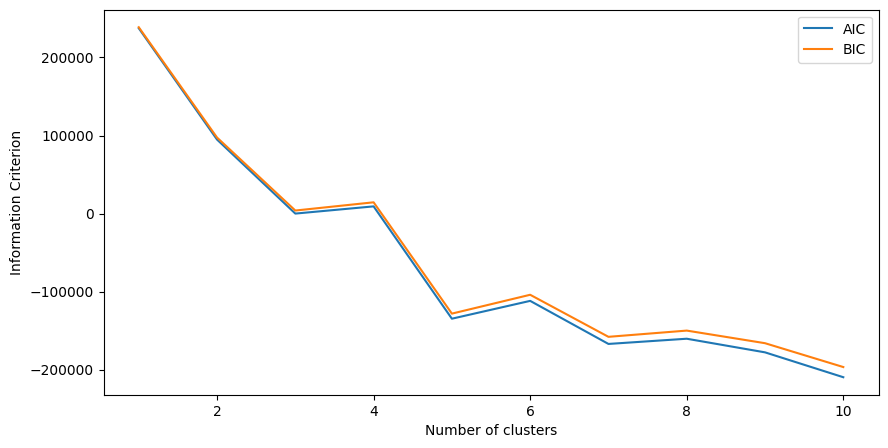

In [473]:
from sklearn.mixture import GaussianMixture

# Optimal cluster number

aic = []
bic = []
n_clusters = range(1, 11)

for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=1502)
    gmm.fit(gmm_df)
    aic.append(gmm.aic(gmm_df))
    bic.append(gmm.bic(gmm_df))

# Plot AIC and BIC
plt.figure(figsize=(10, 5))
plt.plot(n_clusters, aic, label='AIC')
plt.plot(n_clusters, bic, label='BIC')
plt.xlabel('Number of clusters')
plt.ylabel('Information Criterion')
plt.legend()
plt.show()

In [474]:
optimal_clusters_aic = n_clusters[np.argmin(aic)]
optimal_clusters_bic = n_clusters[np.argmin(bic)]

print(f'Optimal number of clusters according to AIC: {optimal_clusters_aic}')
print(f'Optimal number of clusters according to BIC: {optimal_clusters_bic}')

Optimal number of clusters according to AIC: 10
Optimal number of clusters according to BIC: 10


In [475]:
# Gaussian Mixture Model

model=GaussianMixture(n_components=8, 
                      random_state=1502).fit(gmm_df)

In [476]:
# Predict the clusters
cluster = pd.Series(model.predict(gmm_df))

#Create cluster variable
gmm_df['cluster']=cluster

In [477]:
# Cluster check
gmm_df.cluster.value_counts()

cluster
3    2838
4    1097
1     812
0     676
7     615
2     379
5     346
6     280
Name: count, dtype: int64

In [478]:
# Interpretation
check=pd.DataFrame(model.means_,
             columns=list(gmm_df.iloc[:,:-1].columns))
check

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit Card,PaymentMethod_E-Check,PaymentMethod_Mailed Check,Churn_Yes
0,0.091716,54.171598,73.219157,4047.053034,0.504438,0.676036,0.430473,1.000000,0.000000,0.571006,0.000000,0.000000,0.433432,0.566568,0.430473,0.173077,0.000000,0.000000
1,0.020947,20.048935,20.697981,422.244807,0.525923,0.381877,0.358473,1.000000,0.000000,0.149093,0.000000,1.000000,0.448512,0.028340,0.171264,0.132845,0.522195,0.024644
2,0.055409,46.899740,58.509628,2787.748681,0.501319,0.633245,0.435356,0.459103,0.540897,0.179419,0.000000,0.000000,0.374670,0.625330,0.255937,0.060686,0.532981,0.026385
3,0.275899,33.933756,91.951973,3310.619168,0.497886,0.495067,0.214940,1.000000,0.000000,0.642354,1.000000,0.000000,0.177237,0.143763,0.210359,0.562016,0.000000,0.418252
4,0.130146,13.290597,45.072086,636.618300,0.514937,0.301523,0.229487,0.657084,0.342916,0.000000,0.000000,0.090679,0.000000,0.000000,0.130471,0.371358,0.347659,0.397364
5,0.179560,25.147764,81.567215,2142.282912,0.503124,0.399094,0.243393,1.000000,0.000000,0.498634,0.743627,0.000000,0.201760,0.083586,0.192962,0.000000,0.775333,0.464907
6,0.107143,27.871428,55.654464,1515.778211,0.507143,0.407143,0.300000,0.639286,0.360714,0.639286,0.000000,0.000000,0.360714,0.000000,0.000000,0.410714,0.307143,0.196429
7,0.039024,48.647154,21.763008,1072.954959,0.492683,0.661789,0.541463,1.000000,0.000000,0.359350,0.000000,1.000000,0.000000,1.000000,0.305691,0.000000,0.406504,0.000000


In [479]:
check.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit Card,PaymentMethod_E-Check,PaymentMethod_Mailed Check,Churn_Yes
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.112480,33.751372,56.054439,1991.912509,0.505932,0.494472,0.344198,0.844434,0.155566,0.379893,0.217953,0.261335,0.249541,0.305948,0.212145,0.213837,0.361477,0.190998
std,0.083673,14.768590,26.150508,1308.784727,0.010378,0.144839,0.117626,0.222540,0.222540,0.246401,0.409347,0.456986,0.182629,0.376385,0.126522,0.209738,0.265390,0.205988
min,0.020947,13.290597,20.697981,422.244807,0.492683,0.301523,0.214940,0.459103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.051313,23.873057,39.244817,963.870795,0.500461,0.394790,0.239917,0.652635,0.000000,0.171838,0.000000,0.000000,0.132928,0.021255,0.161066,0.045515,0.230357,0.018483
50%,0.099429,30.902592,57.082046,1829.030561,0.503781,0.451105,0.329237,1.000000,0.000000,0.428992,0.000000,0.000000,0.281237,0.113675,0.201661,0.152961,0.377081,0.111407
75%,0.142499,47.336593,75.306171,2918.466303,0.509091,0.640381,0.431694,1.000000,0.347365,0.588076,0.185907,0.318009,0.389361,0.581259,0.268375,0.381197,0.524891,0.402586
max,0.275899,54.171598,91.951973,4047.053034,0.525923,0.676036,0.541463,1.000000,0.540897,0.642354,1.000000,1.000000,0.448512,1.000000,0.430473,0.562016,0.775333,0.464907


__Segment Names__
 <br>
 __Cluster 0:__ Long term users with high total charges who prefers multiple lines, two years contract and credit cards
 <br>
 __Cluster 1:__ Recent users with low total charges who prefers single lines, one year contract and mailed check
 <br>
 __Cluster 2:__ Long term users with above medium total charges who has no phone service, prefers two year contract and credit card
 <br>
 __Cluster 3:__ Medium term users with high total charges who prefers multiple lines, month to month contract and e-check
 <br>
 __Cluster 4:__ Short term users with low total charges who prefers single lines, month to month contract and mailed check
 <br>
 __Cluster 5:__ Recent users with above medium total charges who prefers single lines, month to month contract and mailed check
 <br>
 __Cluster 6:__ Short term users with low total charges who prefers single lines, month to month contract and e-check
 <br>
 __Cluster 7:__ Long term users with low total charges who prefers single lines, two year contract and mailed check

In [480]:
# How do different customer segments differ in terms of churn rates?

In [481]:
check_trans = check.transpose()

In [482]:
subset_df = check.loc[:, ['Churn_Yes']]
subset_df

,Churn_Yes
0,0.000000
1,0.024644
2,0.026385
3,0.418252
4,0.397364
5,0.464907
6,0.196429
7,0.000000


__Customers in Clusters 3, 4 and 5 are likely to churn__

## Univariate Analysis

---

__Now that our data is prepared, we proceed with univariate analysis, which involves examining each variable independently. The goal is to understand the distribution, central tendency, and spread of the data for each variable.__

In [483]:
# Plotting stacked bars with annotations

def plot_stacked_bars(dataframe, title, size=(18, 10), rotation=0, legend_position="upper right"):
    """
    Plots stacked bar charts with annotations.

    Parameters:
    dataframe (pd.DataFrame): DataFrame containing the data to plot.
    title_ (str): Title of the plot.
    size_ (tuple): Size of the plot (width, height). Default is (18, 10).
    rot_ (int): Rotation angle of the x-axis labels. Default is 0.
    legend_ (str): Location of the legend. Default is "upper right".

    Returns:
    None
    """
    # Create a stacked bar plot
    fig,ax = plt.subplots(figsize = size)
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        ax=ax,
        rot=rotation
    )
    ax.set_title(title)
    ax.set_ylabel("Company base (%)")

    # Annotate bars with values
    annotate_stacked_bars(ax, textsize=14)
    
    # Set legend labels and location
    plt.legend(["Retention", "Churn"], loc=legend_position)
    
    # Display the plot
    plt.show()

def annotate_stacked_bars(ax, pad = 0.99, color = 'white', textsize=14):
    """
    Annotates the bars in a stacked bar plot with their respective values.

    Parameters:
    ax (matplotlib.axes.Axes): Axes object of the plot to annotate.
    pad (float, optional): Annotation padding. Defaults to 0.99.
    color (str, optional): Annotation color. Defaults to "white"
    textsize (int): Font size of the annotations. Default is 14.

    Returns:
    None
    """
    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        x, y = patch.get_xy() 
        if height > 0:
            ax.text(x + width / 2, y + height / 2, f'{height:.1f}', 
                    ha='center', va='center', fontsize=textsize, color='white')

# Function to plot distribution
def plot_distribution(dataframe, column, ax, bins=50):
    """
    Plot the distribution of a variable in a stacked histogram for churned or retained companies.

    Parameters:
    dataframe (pd.DataFrame): DataFrame containing the data.
    column (str): The column name to plot the distribution for.
    ax (matplotlib.axes.Axes): Axes object to plot on.
    bins_ (int): Number of bins for the histogram. Default is 50.

    Returns:
    None
    """
      # Create a temporary DataFrame with the data to be plotted
    temp_df = pd.DataFrame({
        "Retention": dataframe[dataframe["Churn_num"] == 0][column],
        "Churn": dataframe[dataframe["Churn_num"] == 1][column]
    })

    # Plot the histogram
    temp_df[["Retention", "Churn"]].plot(kind='hist', bins=bins, ax=ax, stacked=True)
    
    # Set x-axis label
    ax.set_xlabel(column)

    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

In [484]:
# Function to plot categorical columns in client_df by churn (the target variable)

In [485]:
def plot_cat_col_by_churn(df, columns_of_interest, xlabel, title_prefix, save_path=None):
    """
    Plots horizontal stacked bar charts showing the distribution of churned and retained users by specified columns.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    columns_of_interest (list): List of columns to include in the plot.
    xlabel (str): Label for the x-axis.
    title_prefix (str): Prefix for the title of the plot.
    save_path (str, optional): The path where graphs are saved.

    Returns:
    None
    """
    for column in columns_of_interest:
        # Extract relevant columns
        col = df[[column, 'Churn']]

        # Calculate total and percentage of churn
        col_total = col.groupby([column, 'Churn']).size().unstack(fill_value=0)
        col_percentage = (col_total.div(col_total.sum(axis=1), axis=0) * 100).reset_index()

        # Create the plot
        fig, ax = plt.subplots(figsize=(11, 10))

        # Plot the horizontal stacked bar chart
        col_total.plot(kind='barh', stacked=True, color=['#4e79a7', '#f28e2b'], edgecolor='black', ax=ax)

        # Set title and labels
        ax.set_title(f"{title_prefix} - {column} by Churn")
        ax.set_xlabel(xlabel)
        ax.set_ylabel('')

        # Add value labels with percentages
        def add_value_labels_with_percent(ax, total):
            for p in ax.patches:
                width = p.get_width()
                if width > 0:
                    percentage = width / total * 100
                    ax.annotate(f'{int(width)}\n({percentage:.1f}%)',
                                (p.get_x() + width / 2., p.get_y() + p.get_height() / 2.),
                                ha='center', va='center', fontsize=10, color='black')

        # Calculate the total number of users for percentage calculation
        total_col = col_total.sum().sum()
        add_value_labels_with_percent(ax, total_col)

        # Save the plot if save_path is provided
        if save_path:
            filename = f"{save_path}/{column}_by_churn.jpg"
            plt.savefig(filename)

        # Show the plot
        plt.show()

In [486]:
# Function to plot continuous numerical functions

In [487]:
def plot_all_distributions(dataframe, columns, save_path=None):
    """
    Iterates through the specified columns and applies the plot_distribution function to each column.

    Parameters:
    dataframe (pd.DataFrame): DataFrame containing the data.
    columns (list): List of column names to plot.
    save_path (str, optional): The path where graphs are saved.

    Returns:
    None
    """
    num_columns = len(columns)
    fig, axs = plt.subplots(nrows=num_columns, figsize=(8, 5 * num_columns))

    if num_columns == 1:
        axs = [axs]  # Ensure axs is iterable if there's only one subplot

    for ax, column in zip(axs, columns):
        plot_distribution(dataframe, column, ax)
    
    # Save the plot
    if save_path:
            filename = f"{save_path}/{column}.jpeg"
            plt.savefig(filename)

    plt.tight_layout()
    plt.show()

### Plotting the categorical columns of data

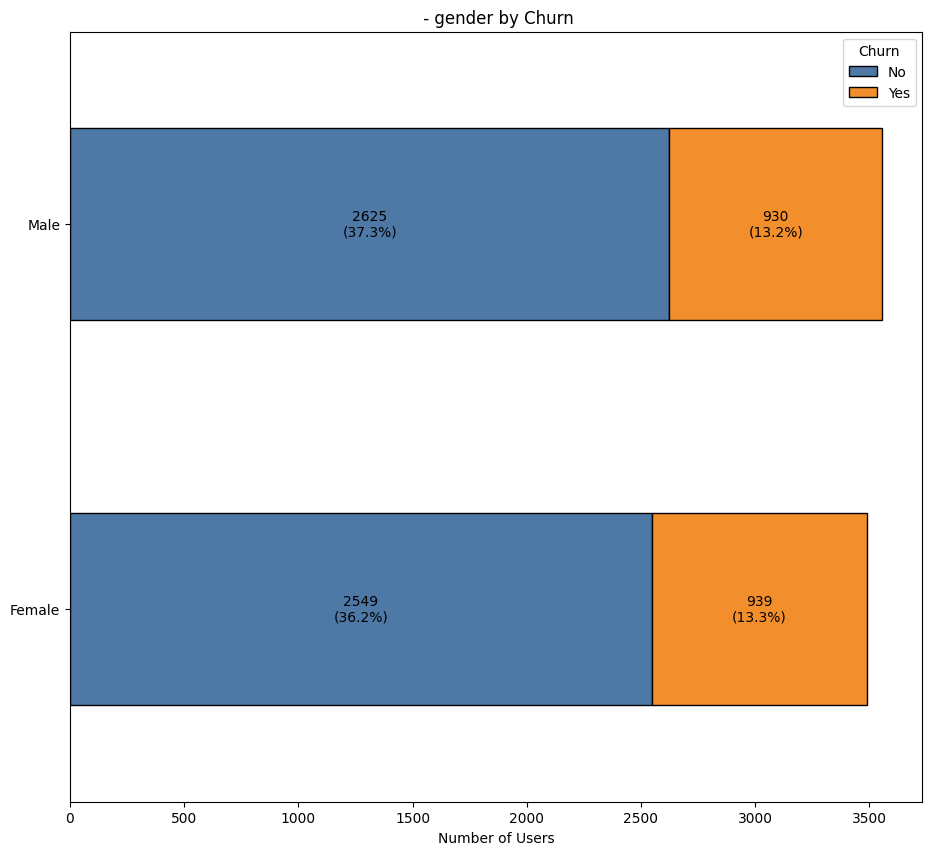

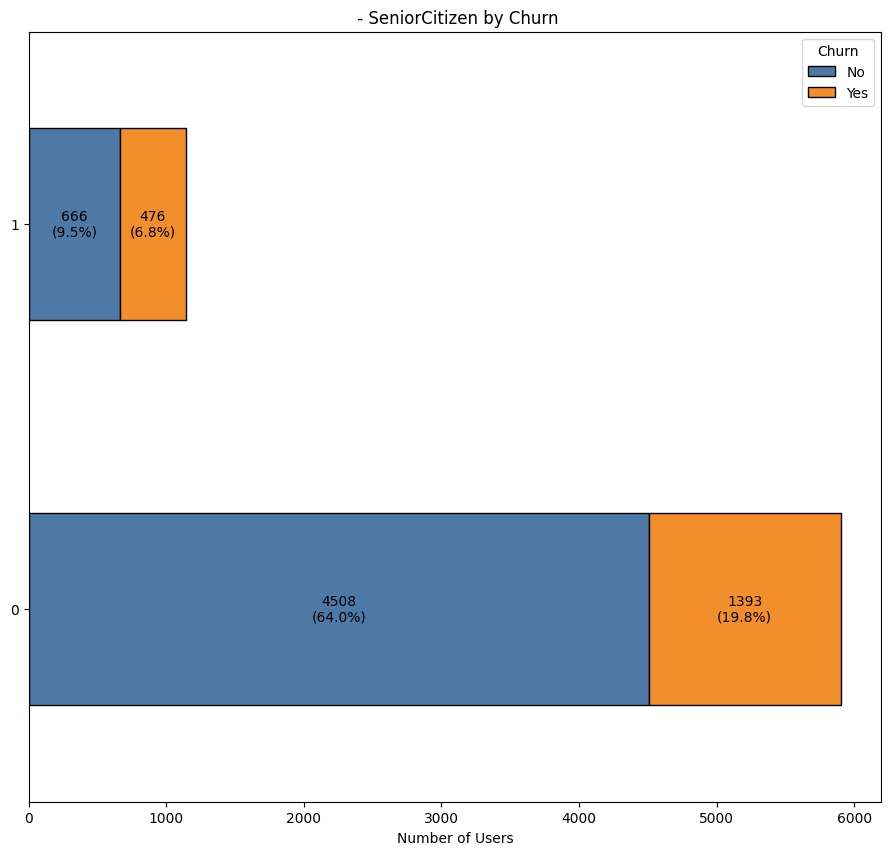

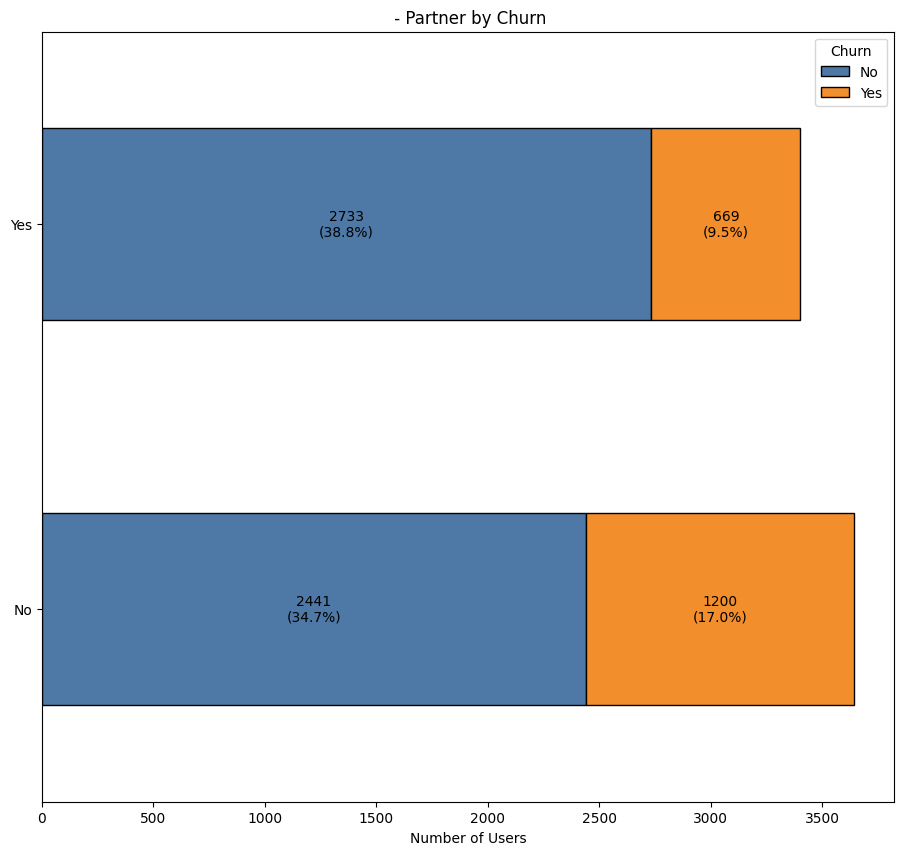

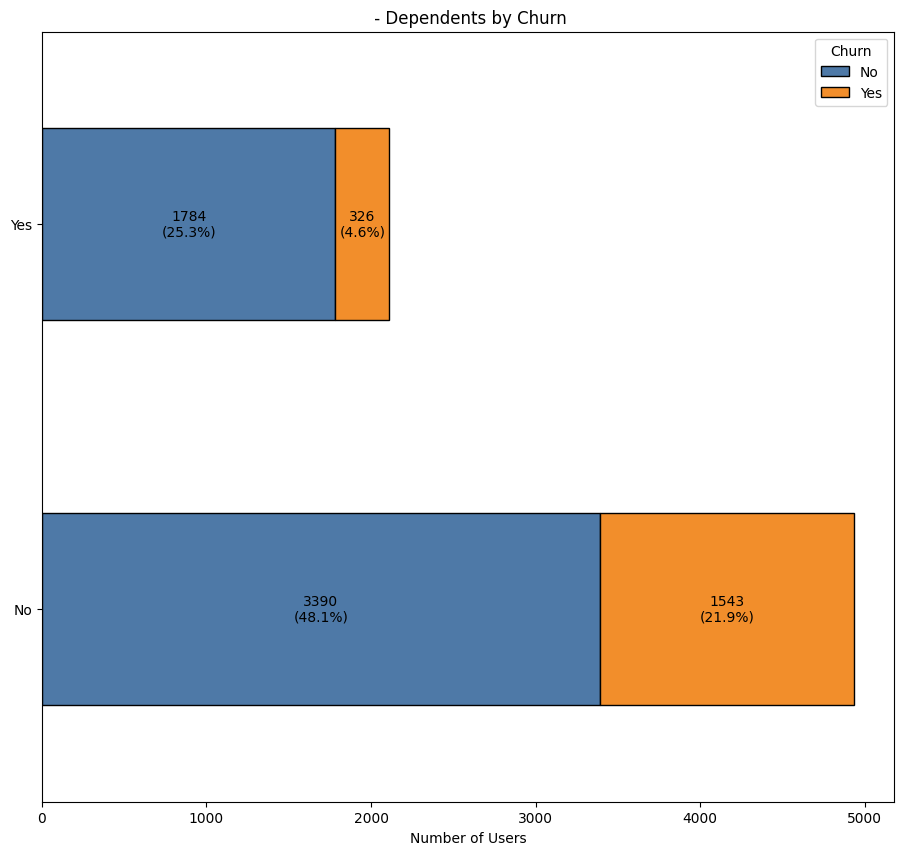

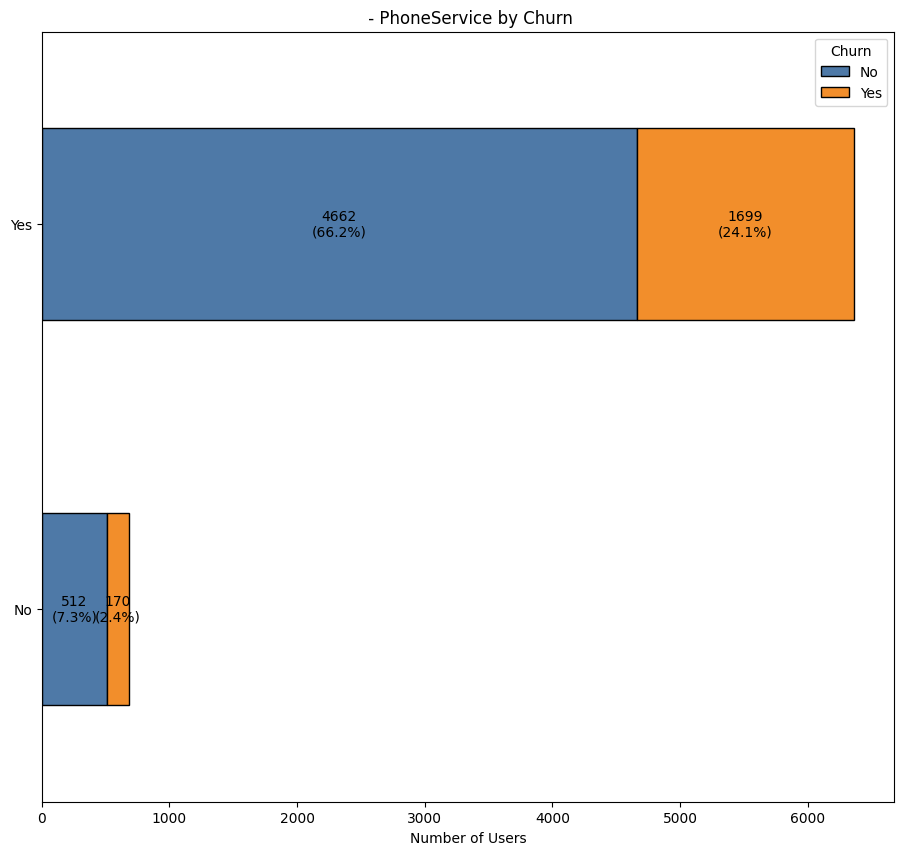

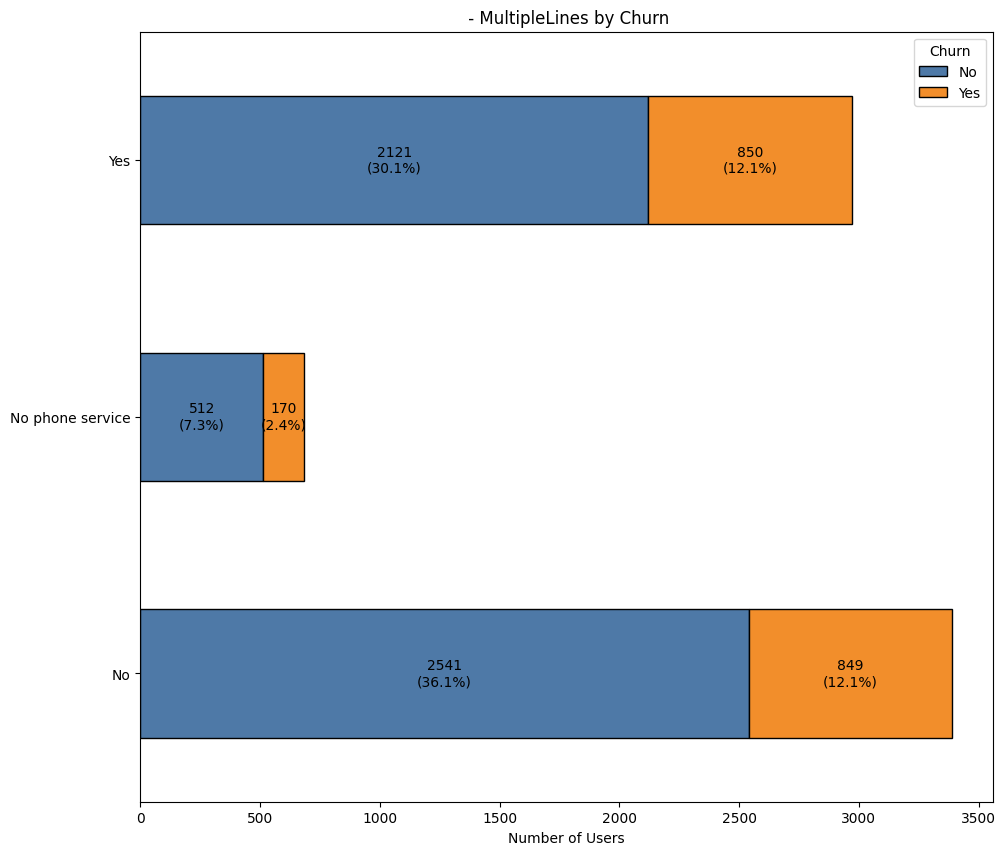

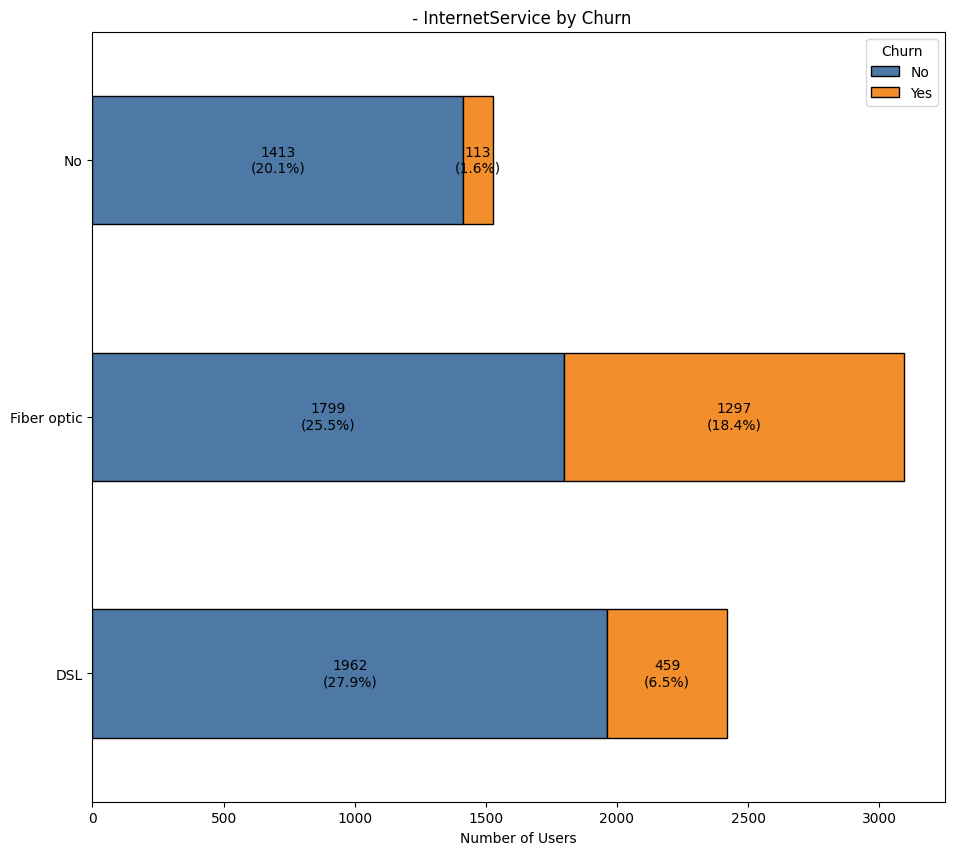

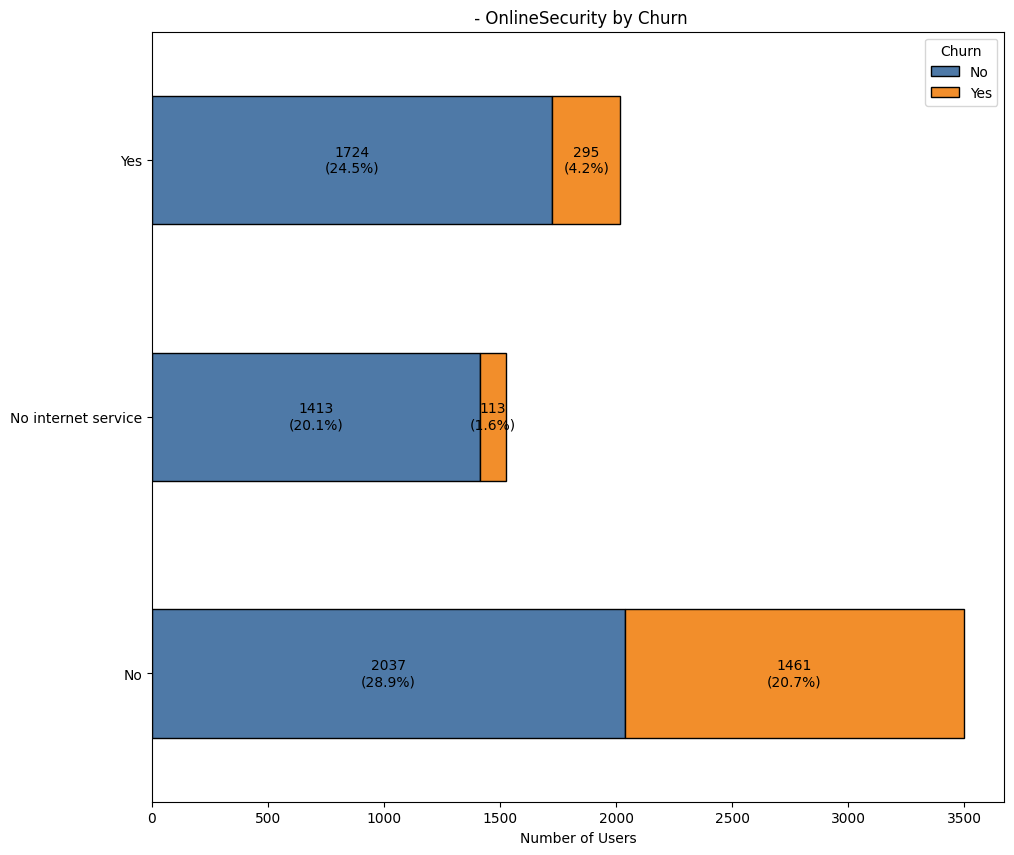

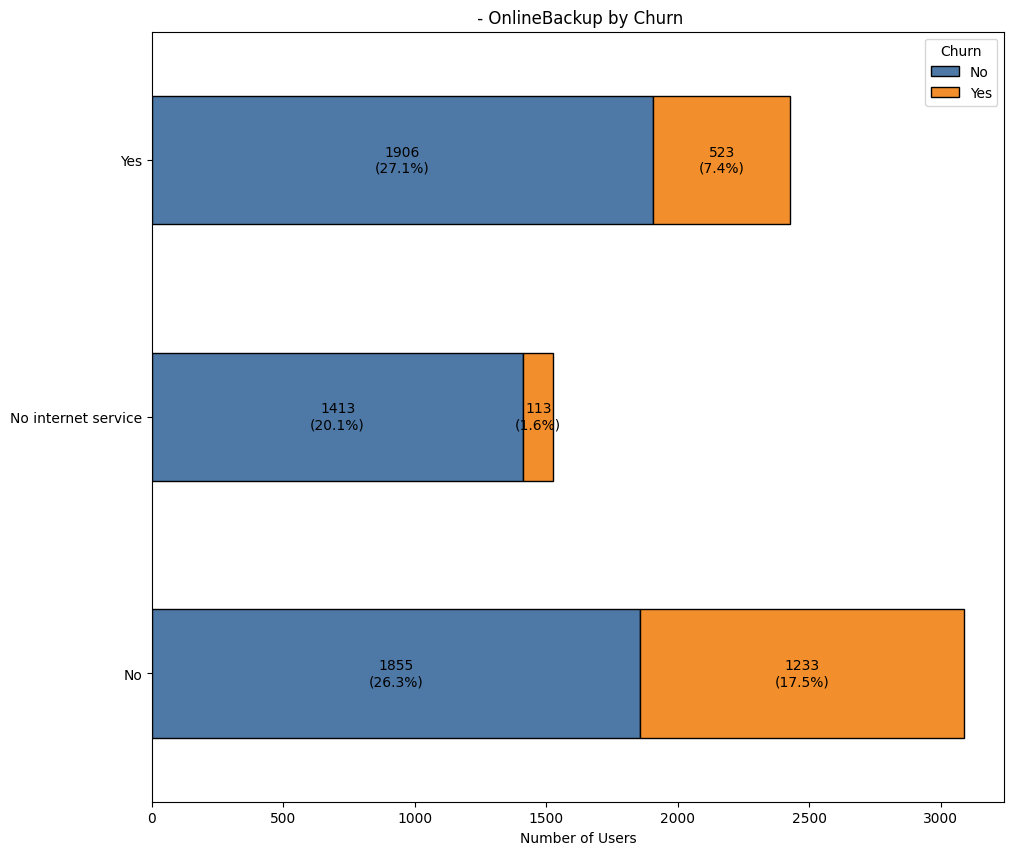

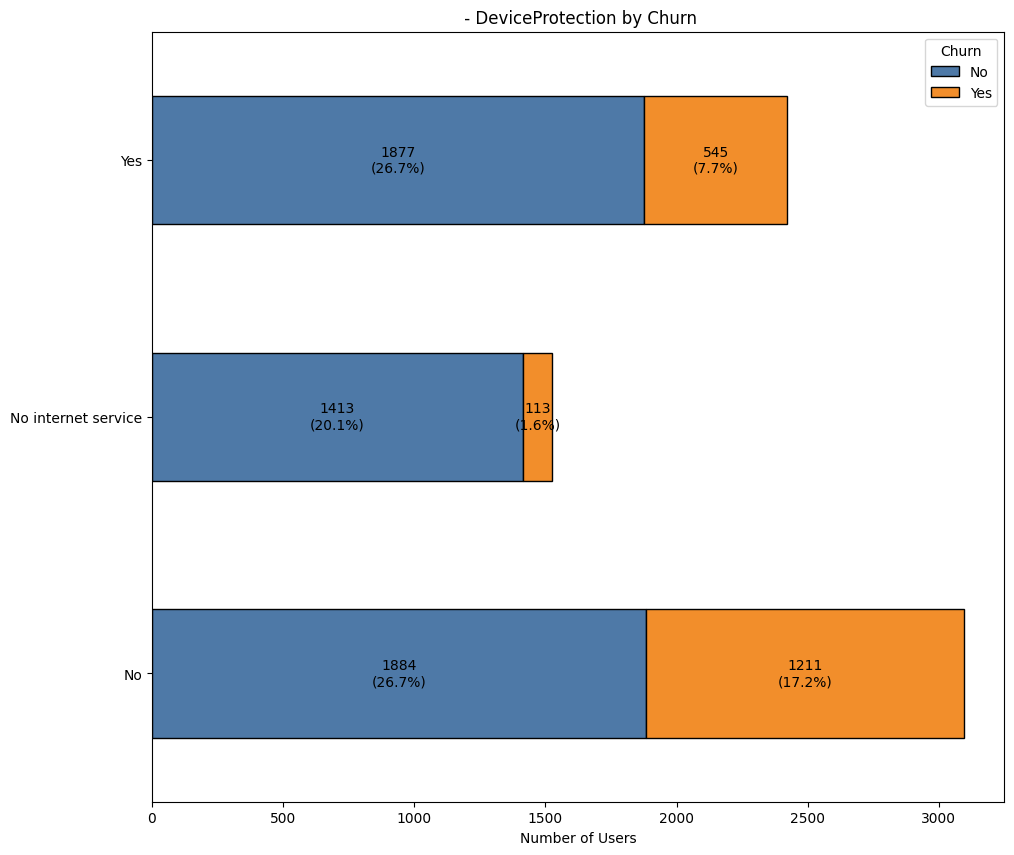

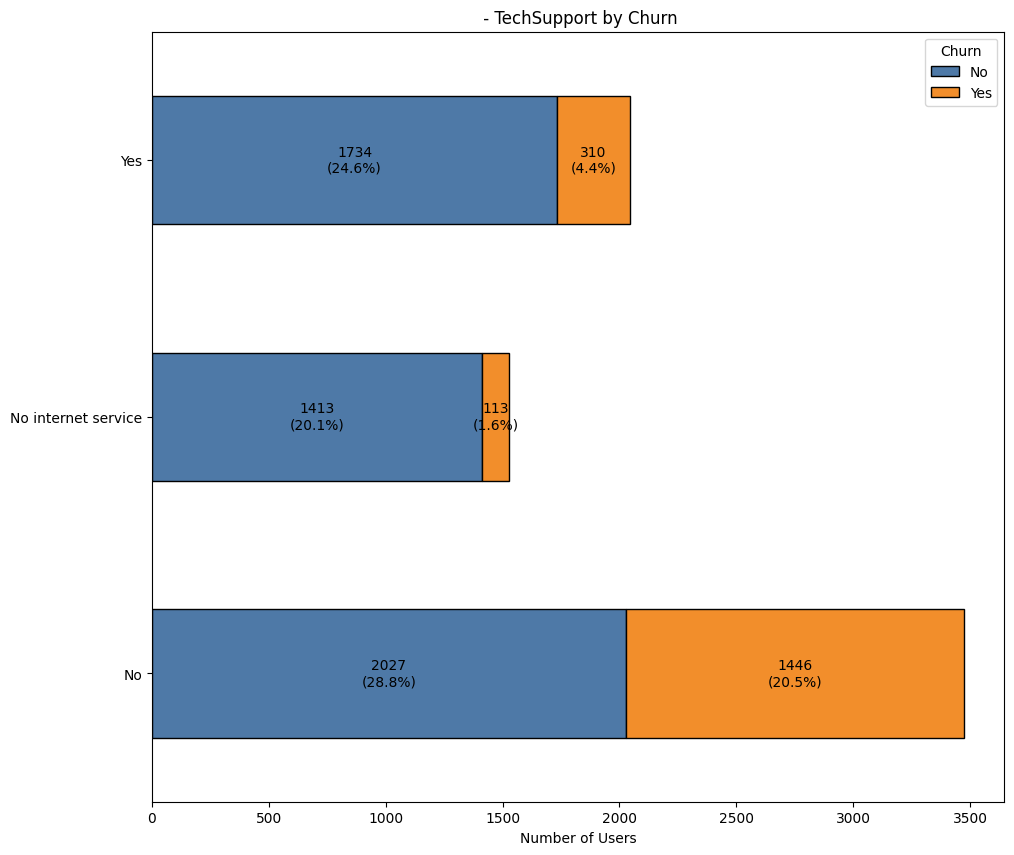

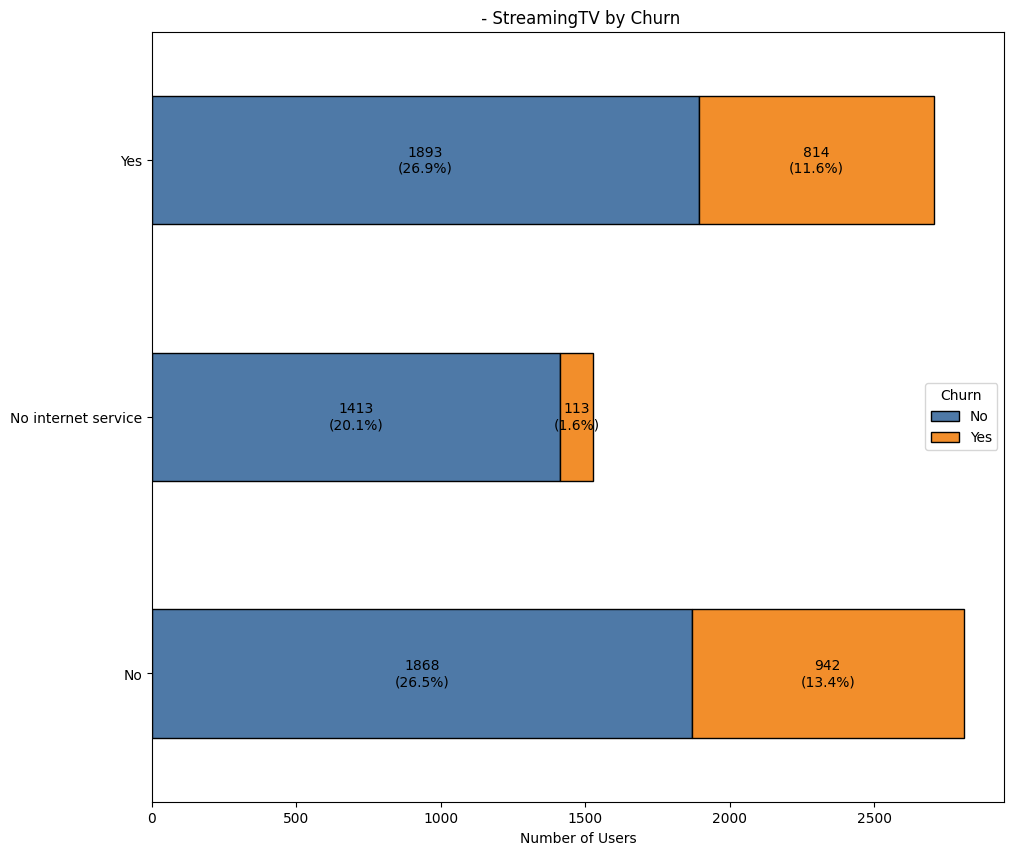

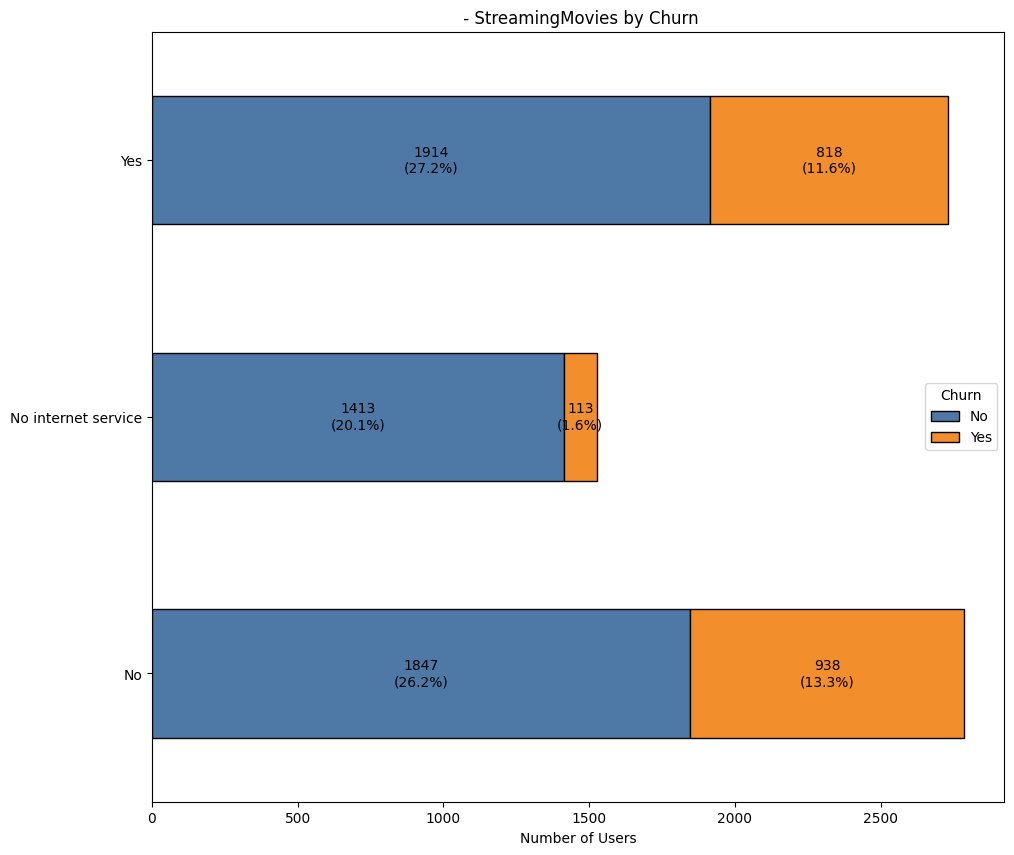

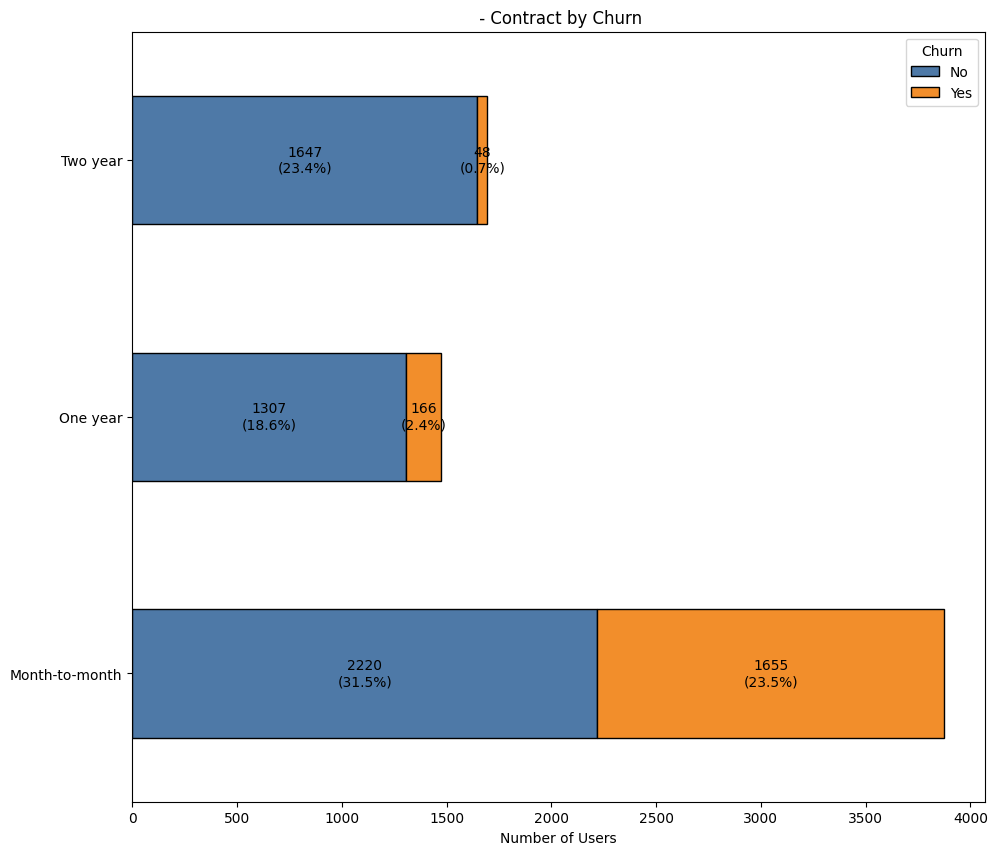

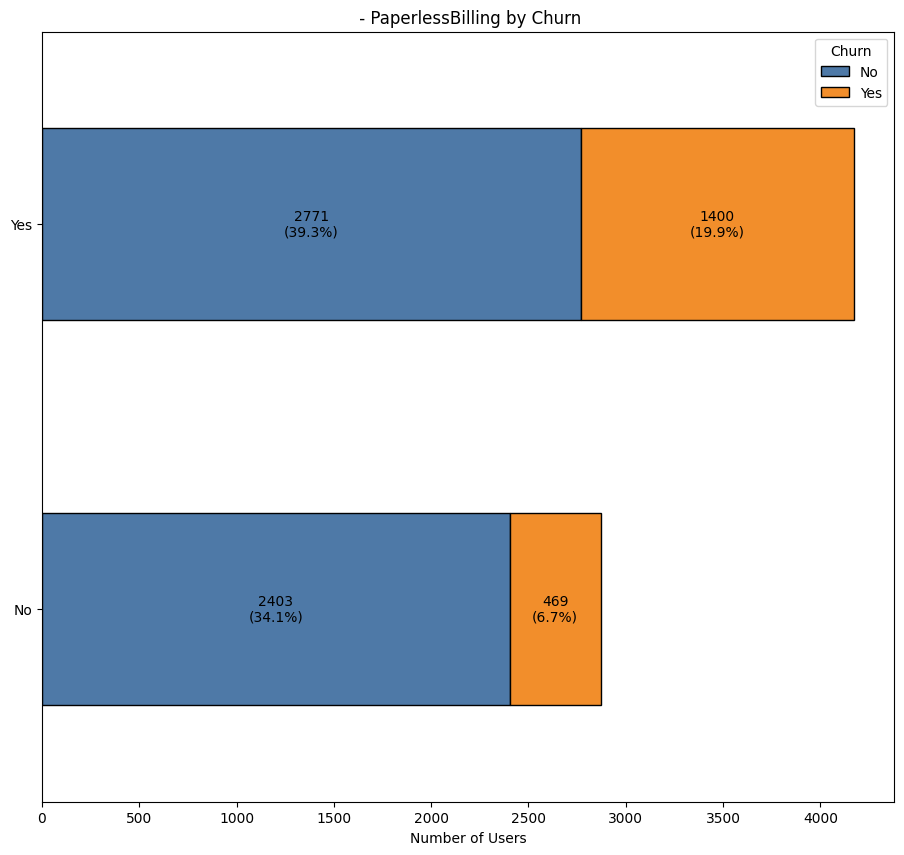

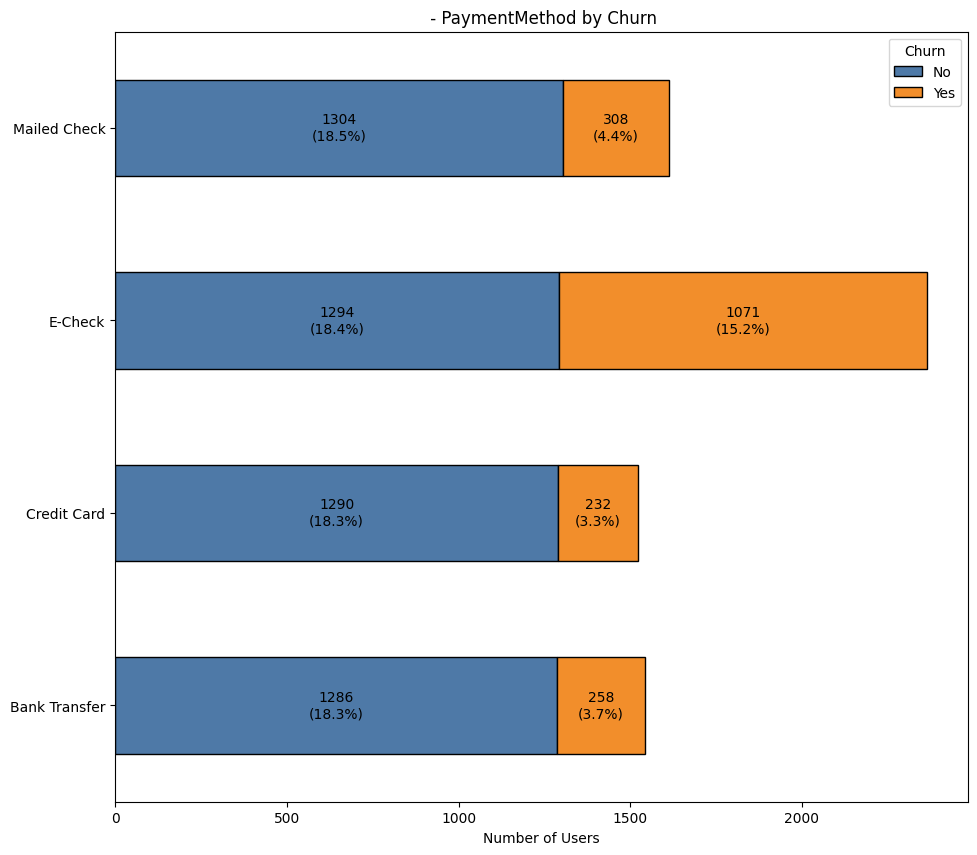

In [488]:
# cat_col graphs
cat_col.remove('Churn')
plot_cat_col_by_churn(data, cat_col, xlabel='Number of Users', title_prefix='', save_path = r'C:\Users\USER\Documents\database 1')

### Numerical Variables
---
Next, we analyze the numerical variables to understand  and to explore the distribution of these variables.

In [489]:
# Convert 'Churn' column to numerical values
data['Churn_num'] = data['Churn'].map({'Yes': 1, 'No': 0})

data_num = data.select_dtypes(include =(np.number))
data_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


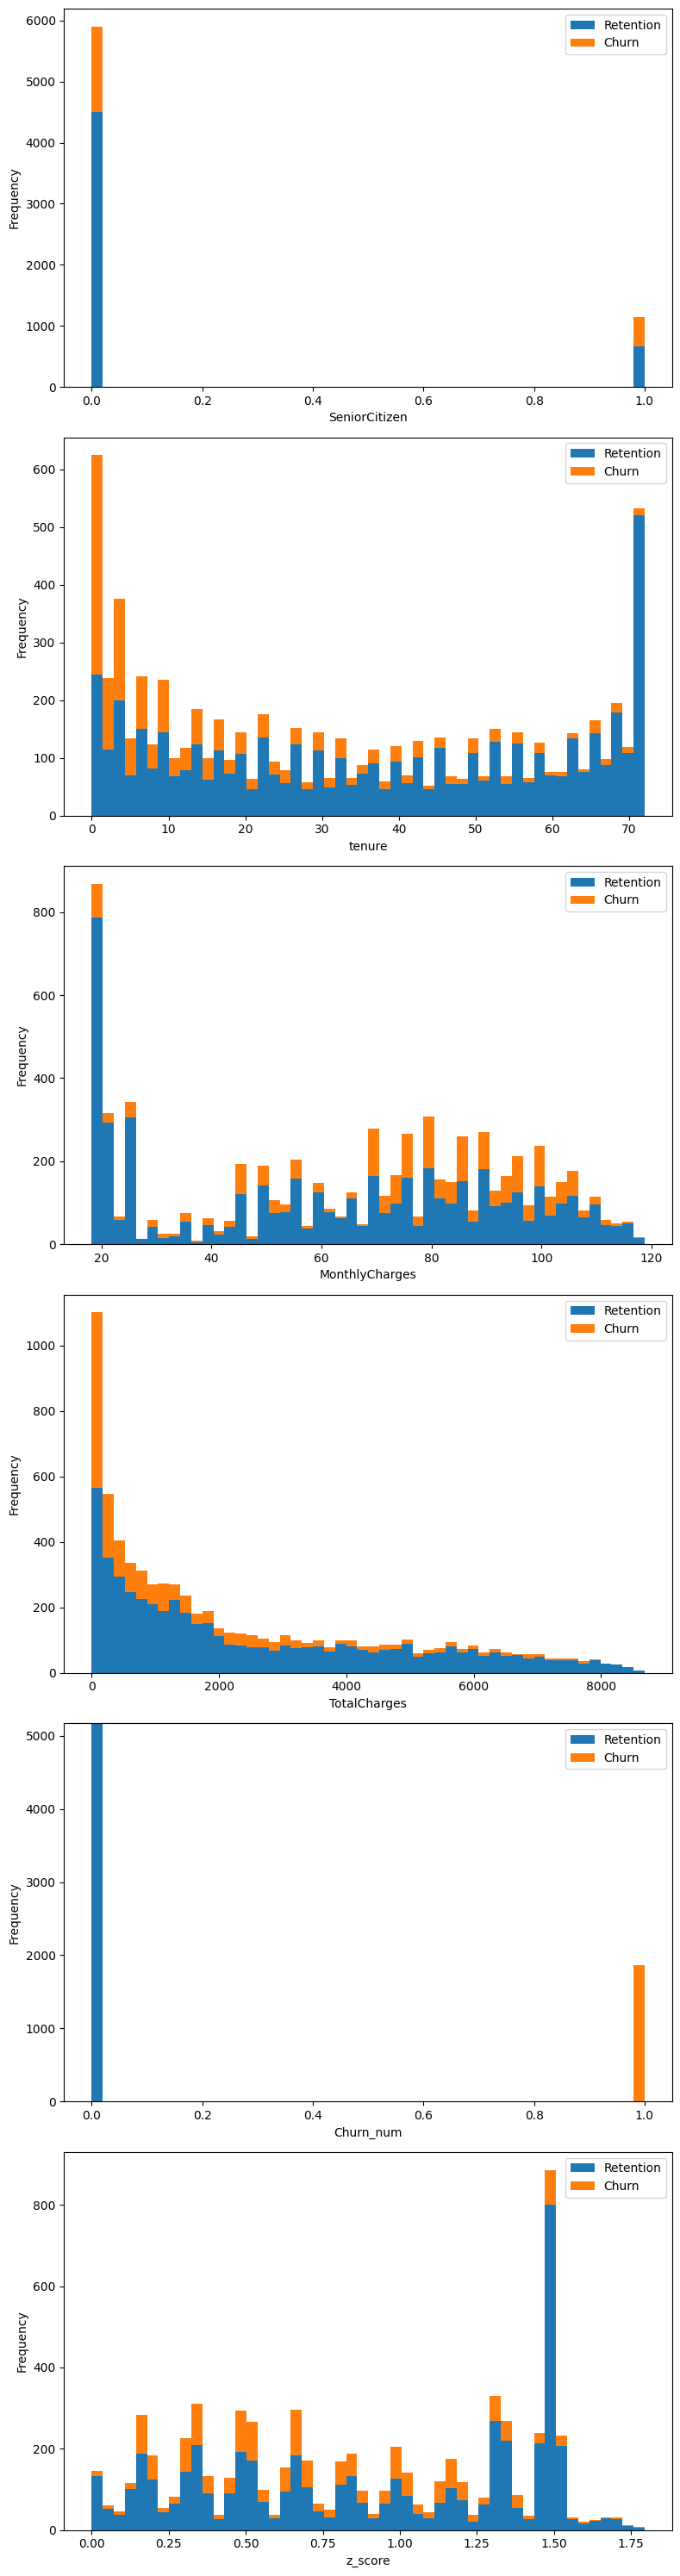

In [503]:
#Plotting the distribution of numeric columns in data
columns_of_interest = data_num.columns.to_list() 
dist = plot_all_distributions(data_num, columns_of_interest, save_path = r'C:\Users\USER\Documents\database 1')

In [492]:
# BoxPlots for the numeric columns

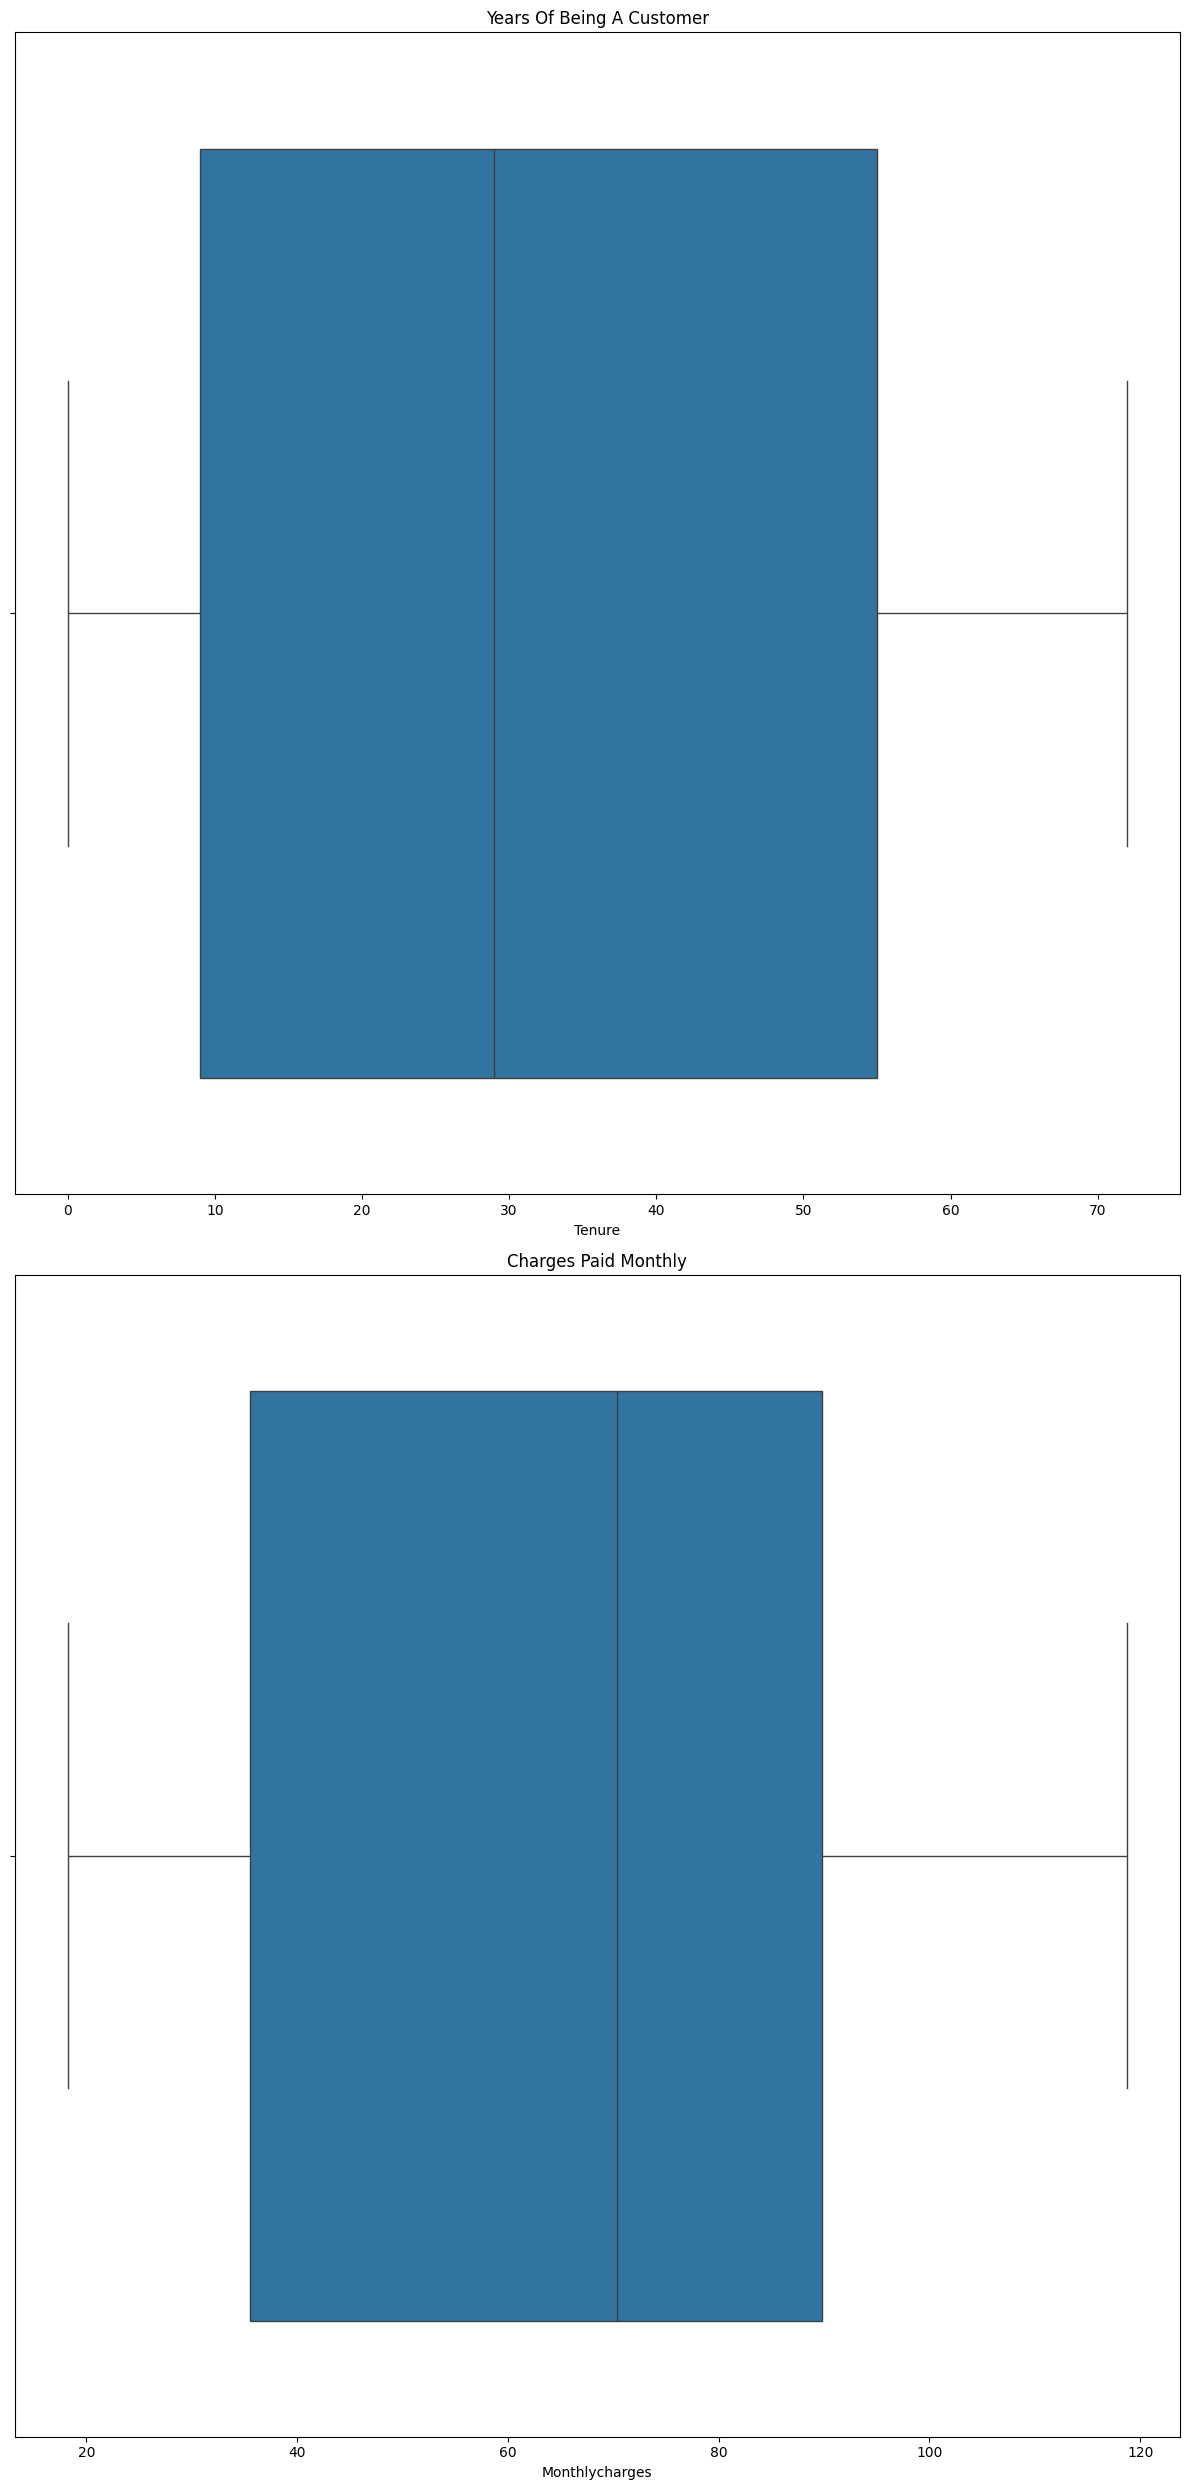

In [493]:
# Create subplots
fig, axs = plt.subplots(nrows=2, figsize=(12, 25))

# List of columns to plot and their titles
columns = ["tenure", "MonthlyCharges"]
titles = ["Years Of Being A Customer", "Charges Paid Monthly"]

# Plot each boxplot
for ax, column, title in zip(axs, columns, titles):
    sns.boxplot(x=data_num[column], ax=ax, orient='h')
    ax.set_title(title)
    ax.set_xlabel(column.replace('_', ' ').title())
    ax.ticklabel_format(style='plain', axis='x')
    ax.grid(False)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [494]:
# Calculate summary statistics for data_num
data_num.describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num
count,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,2279.73,0.27
std,0.37,24.56,30.09,2266.79,0.44
min,0.00,0.00,18.25,0.00,0.00
25%,0.00,9.00,35.50,398.55,0.00
50%,0.00,29.00,70.35,1394.55,0.00
75%,0.00,55.00,89.85,3786.60,1.00
max,1.00,72.00,118.75,8684.80,1.00


In the summary statistics table above, notice that percentiles absence the presence of significant outliers. Thus, before plotting the histogram, we check for extreme outliers (above the 95th percentile) to focus on the majority of users. This helps us create a clearer and more interpretable histogram, as the extreme values can distort our understanding of the overall distribution.

In [495]:
# To identify outliers for MonthlyCharges
from scipy import stats

# Calculate Z-scores
data_num['z_score'] = np.abs(stats.zscore(data_num['MonthlyCharges']))

# Identify outliers
outliers = data_num[(data_num['z_score'] > 3) | (data_num['z_score'] < -3)]

In [496]:
outliers["MonthlyCharges"].describe().round(2)

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MonthlyCharges, dtype: float64

In [497]:
data.dropna().head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed Check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Transfer,42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes,1


## Bivariate Analysis

---

Having examined the distribution of individual variables, we now move on to bivariate analysis. In this section, we explore the relationships between pairs of variables to uncover potential patterns and insights. This involves visualizing how different variables interact with each other, which can help us identify trends and areas for deeper analysis.

### Stacked Bar Charts by churn

#### Churn by customerID

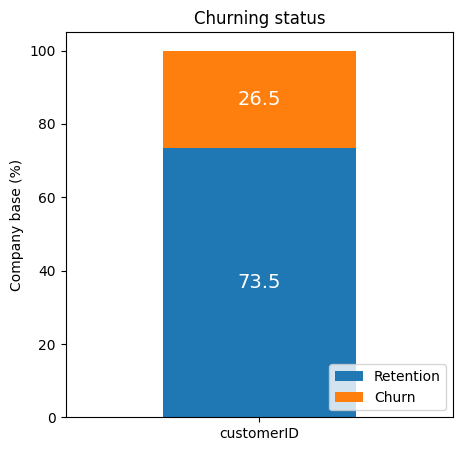

In [509]:
# Extract and rename columns for clarity
churn = data[['customerID', 'Churn']]

# Calculate total and percentage of churn
churn_total = churn.groupby('Churn').count()
churn_percentage = (churn_total / churn_total.sum()) * 100.0

churn_bar = plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_position="lower right")

#### Churn By Client details

In [513]:
client_details = data[['customerID', 'gender', 'SeniorCitizen',
                      'Partner', 'Dependents', 'Churn_num']]
client_gender = client_details.groupby([client_details['gender'], client_details['Churn_num']])['customerID'].count().unstack(level=1).fillna(0)
gender_churn = (client_gender.div(client_gender.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

In [514]:
gender_churn

Churn_num,0,1
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


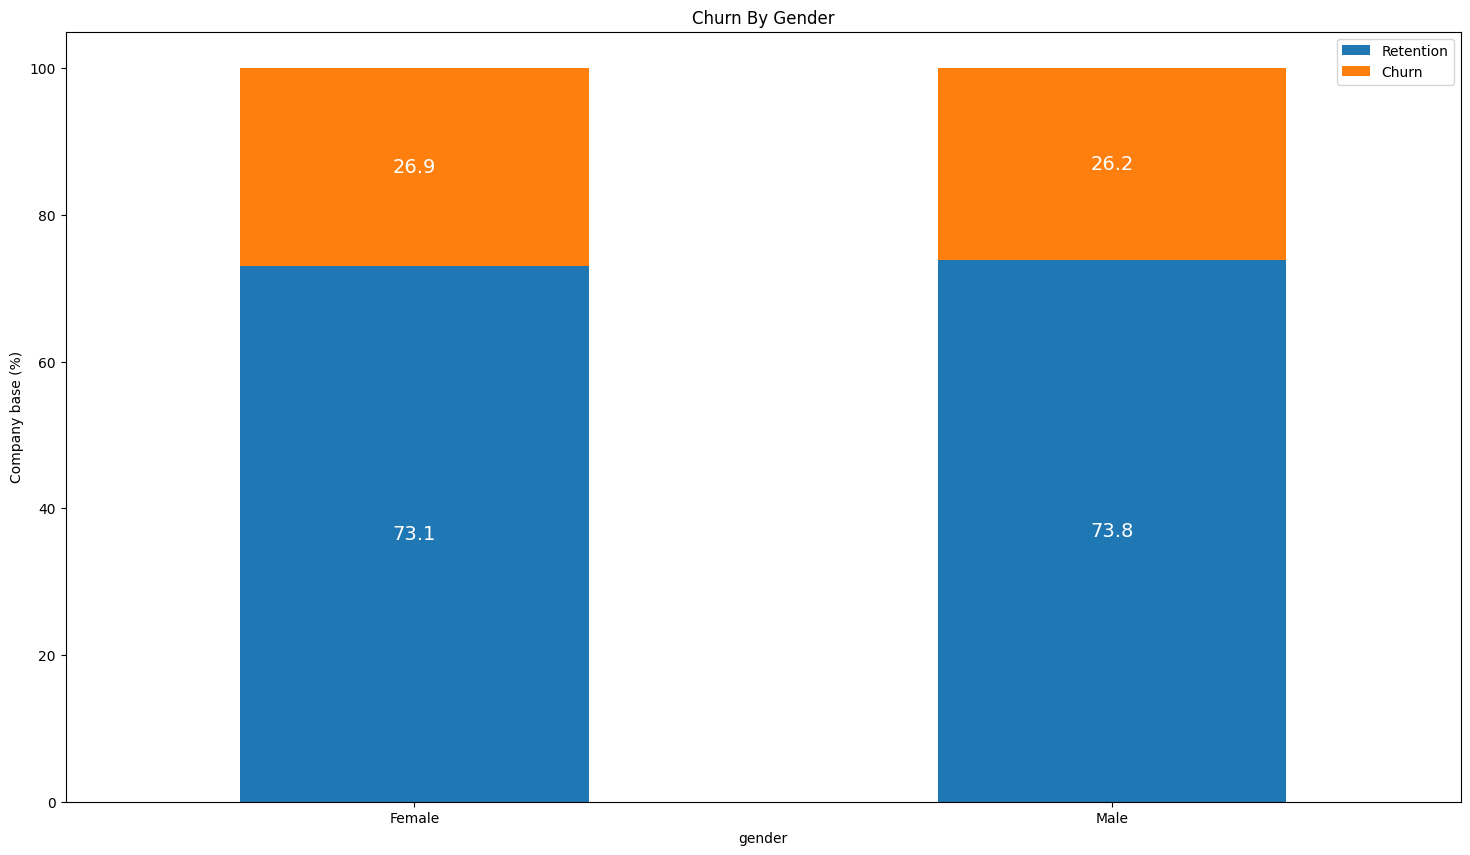

In [515]:
plot_stacked_bars(gender_churn, "Churn By Gender")

In [516]:
client_status = client_details.groupby([client_details['SeniorCitizen'], client_details['Churn_num']])['customerID'].count().unstack(level=1).fillna(0)
status_churn = (client_status.div(client_status.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

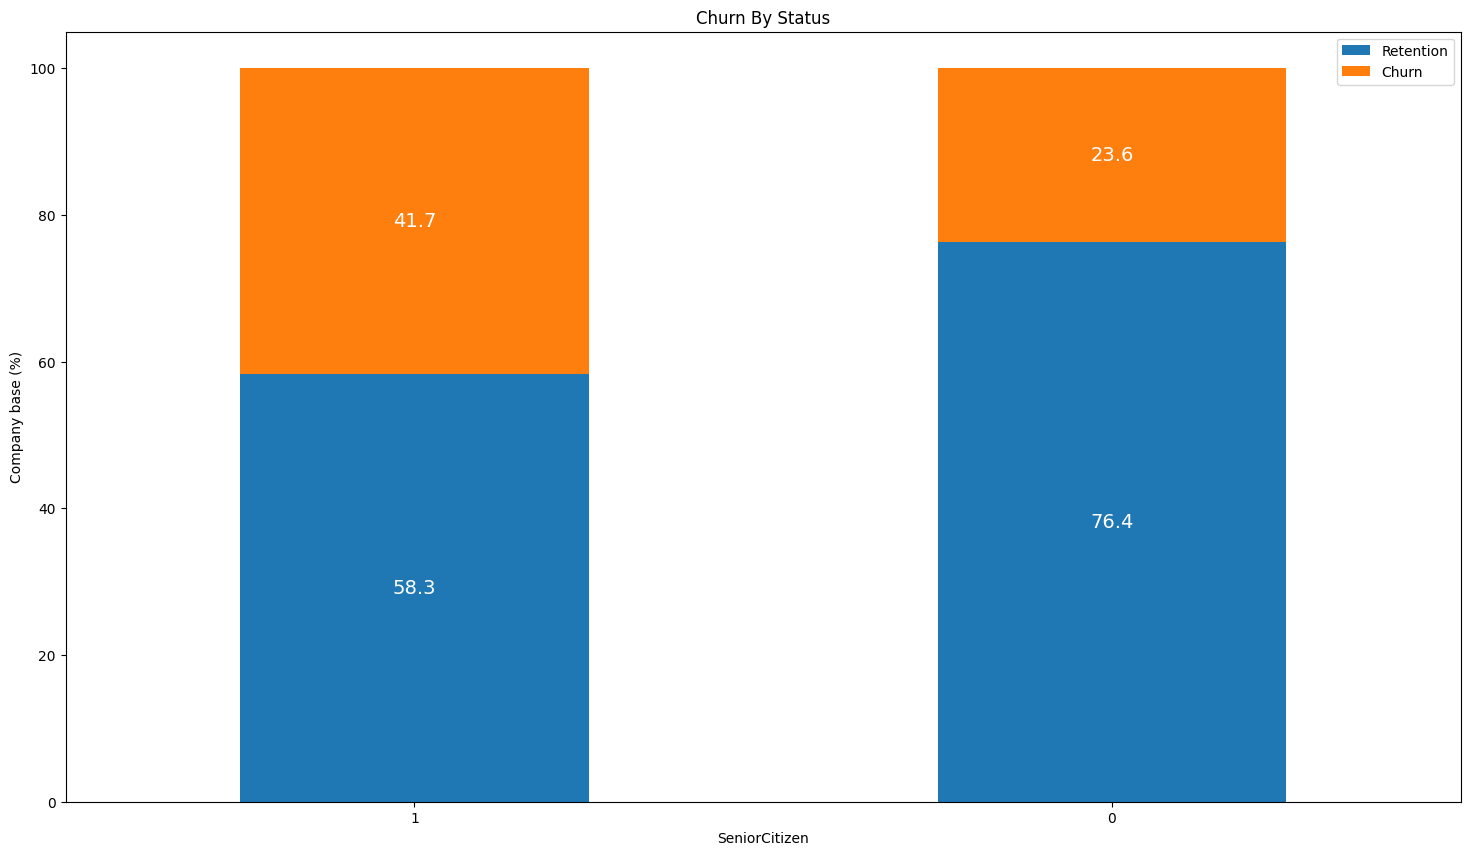

In [517]:
plot_stacked_bars(status_churn, "Churn By Status")

In [518]:
partner_status = client_details.groupby([client_details['Partner'], client_details['Churn_num']])['customerID'].count().unstack(level=1).fillna(0)
partner_churn = (partner_status.div(partner_status.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

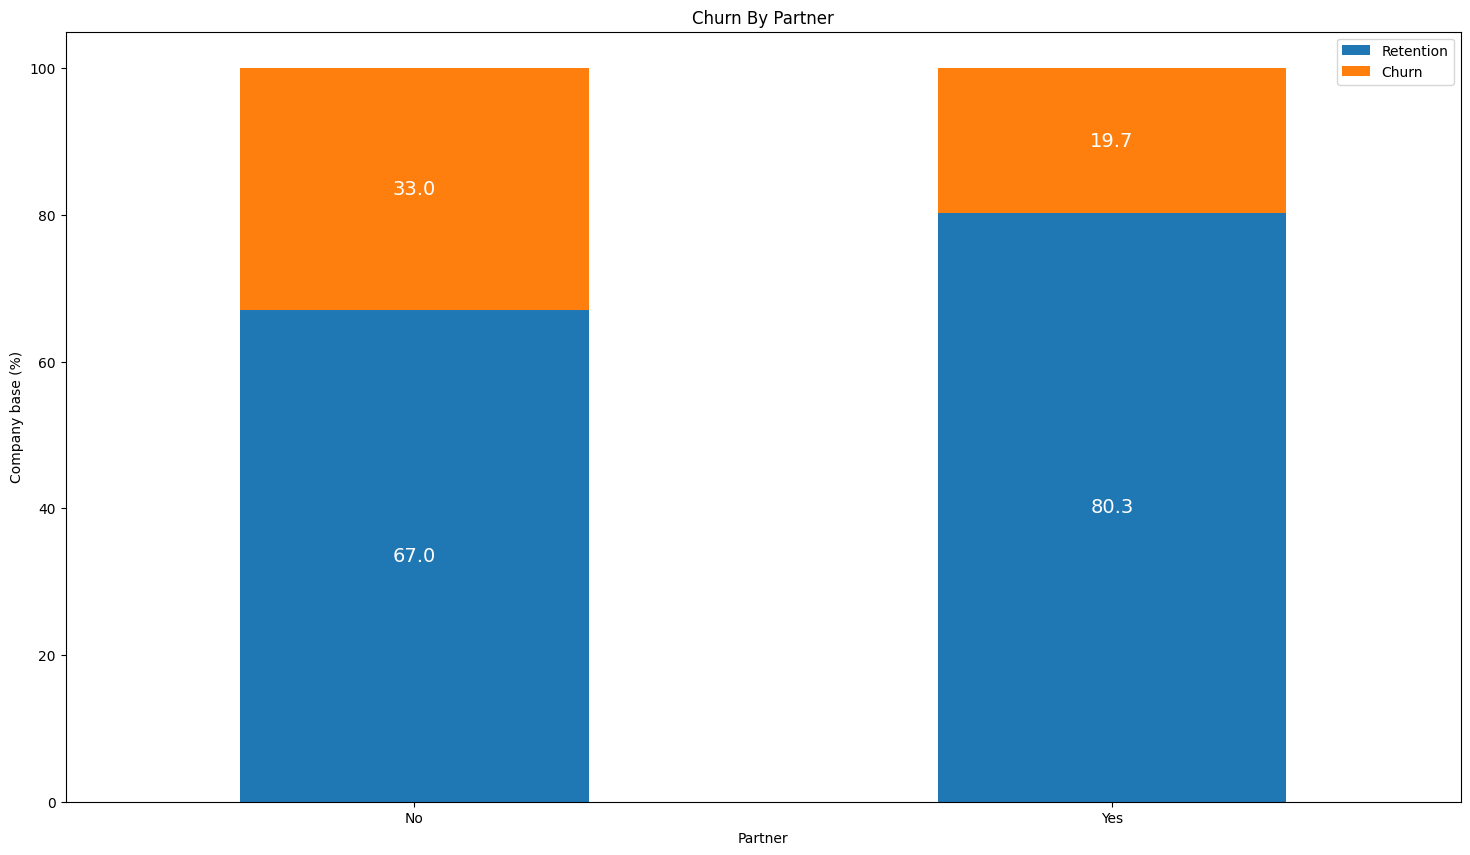

In [519]:
plot_stacked_bars(partner_churn, "Churn By Partner")

In [520]:
depend_status = client_details.groupby([client_details['Dependents'], client_details['Churn_num']])['customerID'].count().unstack(level=1).fillna(0)
depend_churn = (depend_status.div(depend_status.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

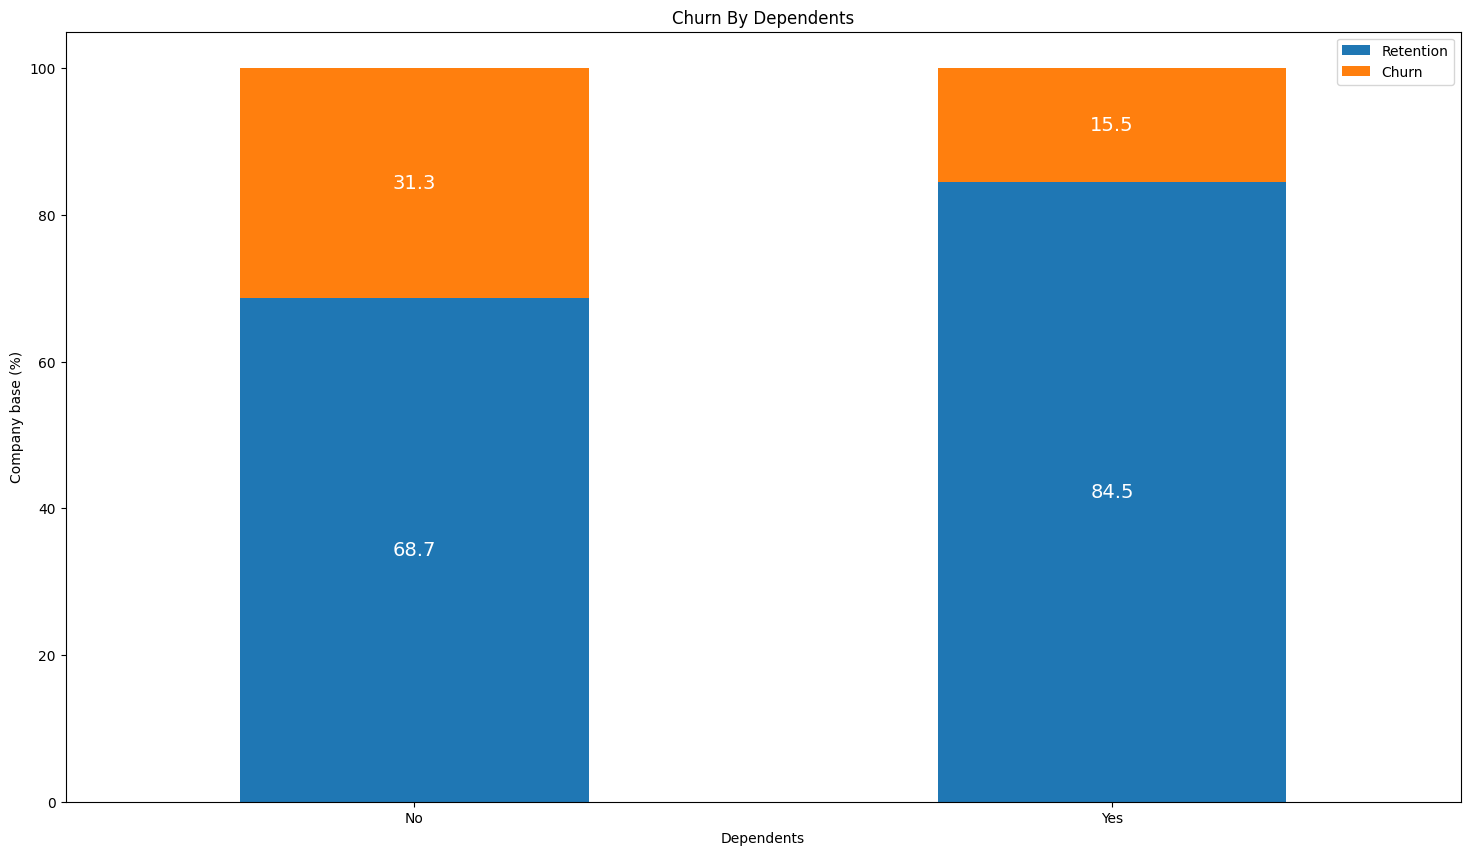

In [521]:
plot_stacked_bars(depend_churn, "Churn By Dependents")

#### Churn By Phone services

In [522]:
phone_details = data[['customerID', 'PhoneService', 'MultipleLines', 'Churn_num']]
phone_service = phone_details.groupby([phone_details['PhoneService'], phone_details['Churn_num']])['customerID'].count().unstack(level=1).fillna(0)
service_churn = (phone_service.div(phone_service.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

In [523]:
service_churn

Churn_num,0,1
PhoneService,,
Yes,73.290363,26.709637
No,75.073314,24.926686


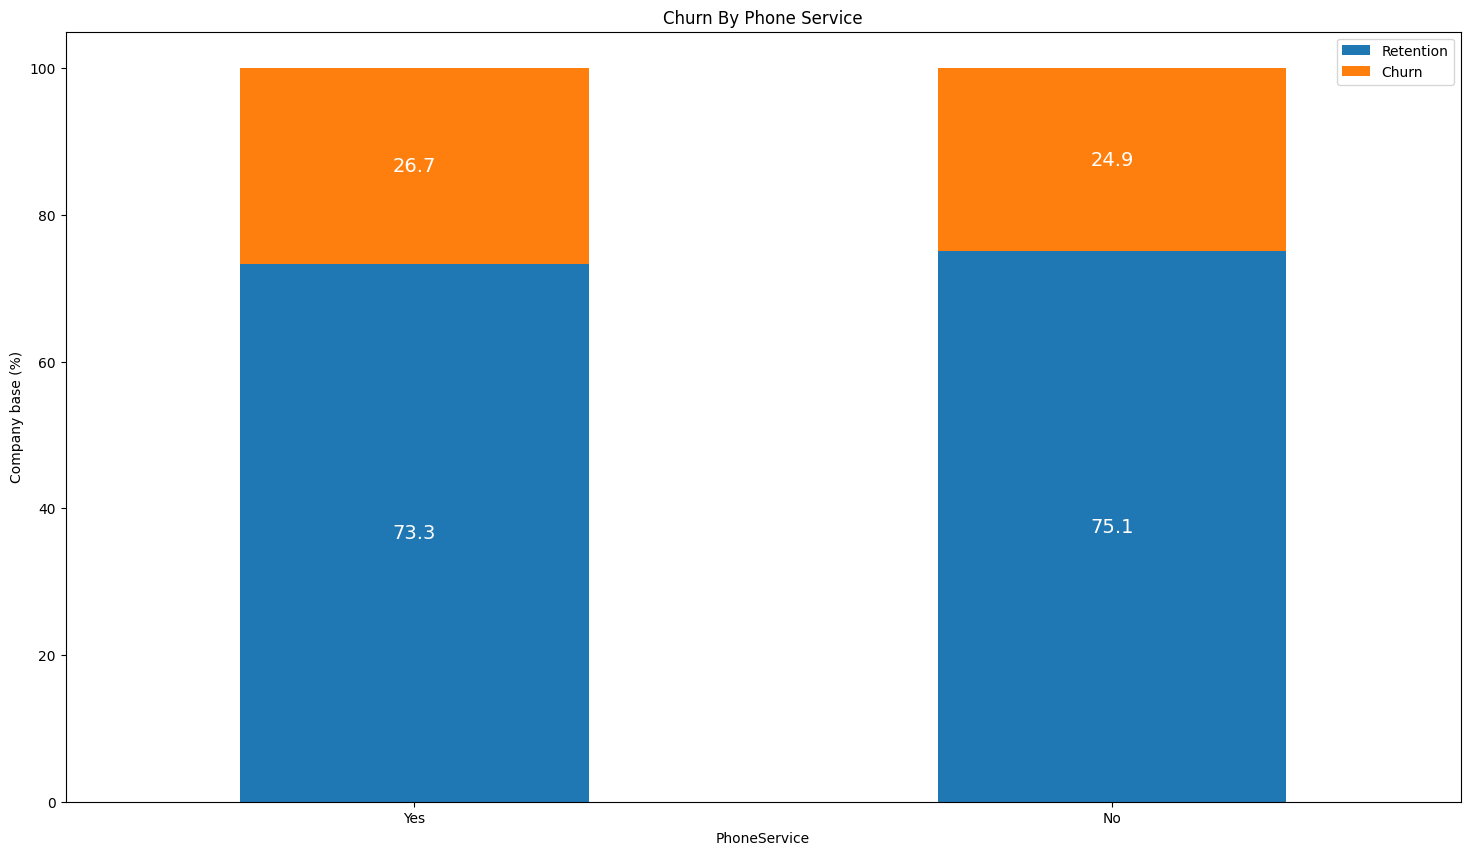

In [524]:
plot_stacked_bars(service_churn, "Churn By Phone Service")

In [525]:
multi_lines = phone_details.groupby([phone_details['MultipleLines'], phone_details['Churn_num']])['customerID'].count().unstack(level=1).fillna(0)
multilines_churn = (multi_lines.div(multi_lines.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

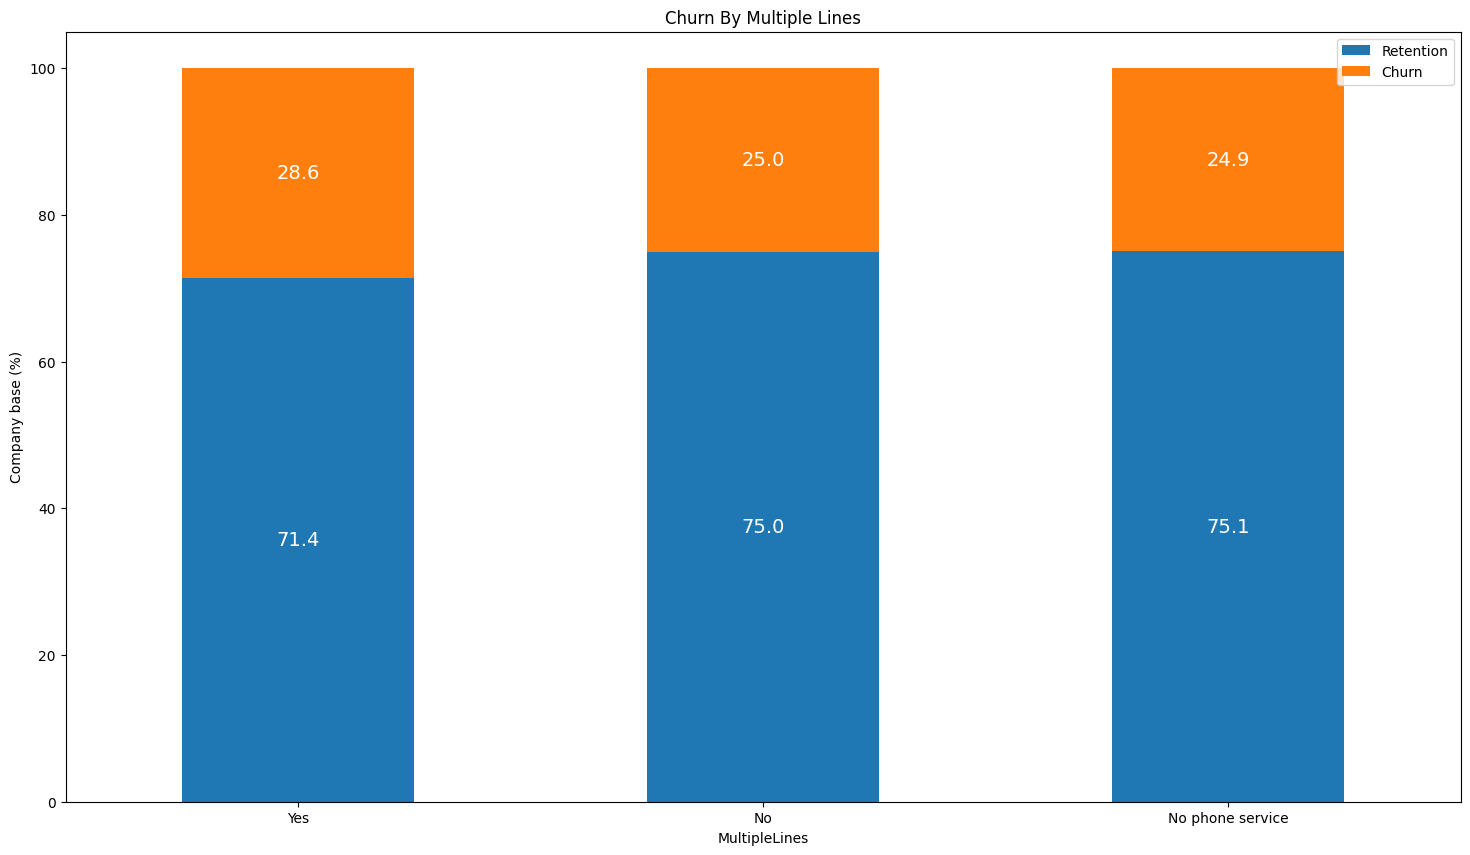

In [526]:
plot_stacked_bars(multilines_churn, "Churn By Multiple Lines")

#### Churn By Internet Services

In [527]:
internet_details = data[['customerID', 'InternetService','OnlineSecurity',
                         'OnlineBackup','DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies', 'Churn_num']]
internet_service = internet_details.groupby([internet_details['InternetService'], internet_details['Churn_num']])['customerID'].count().unstack(level=1).fillna(0)
online_service_churn = (internet_service.div(internet_service.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

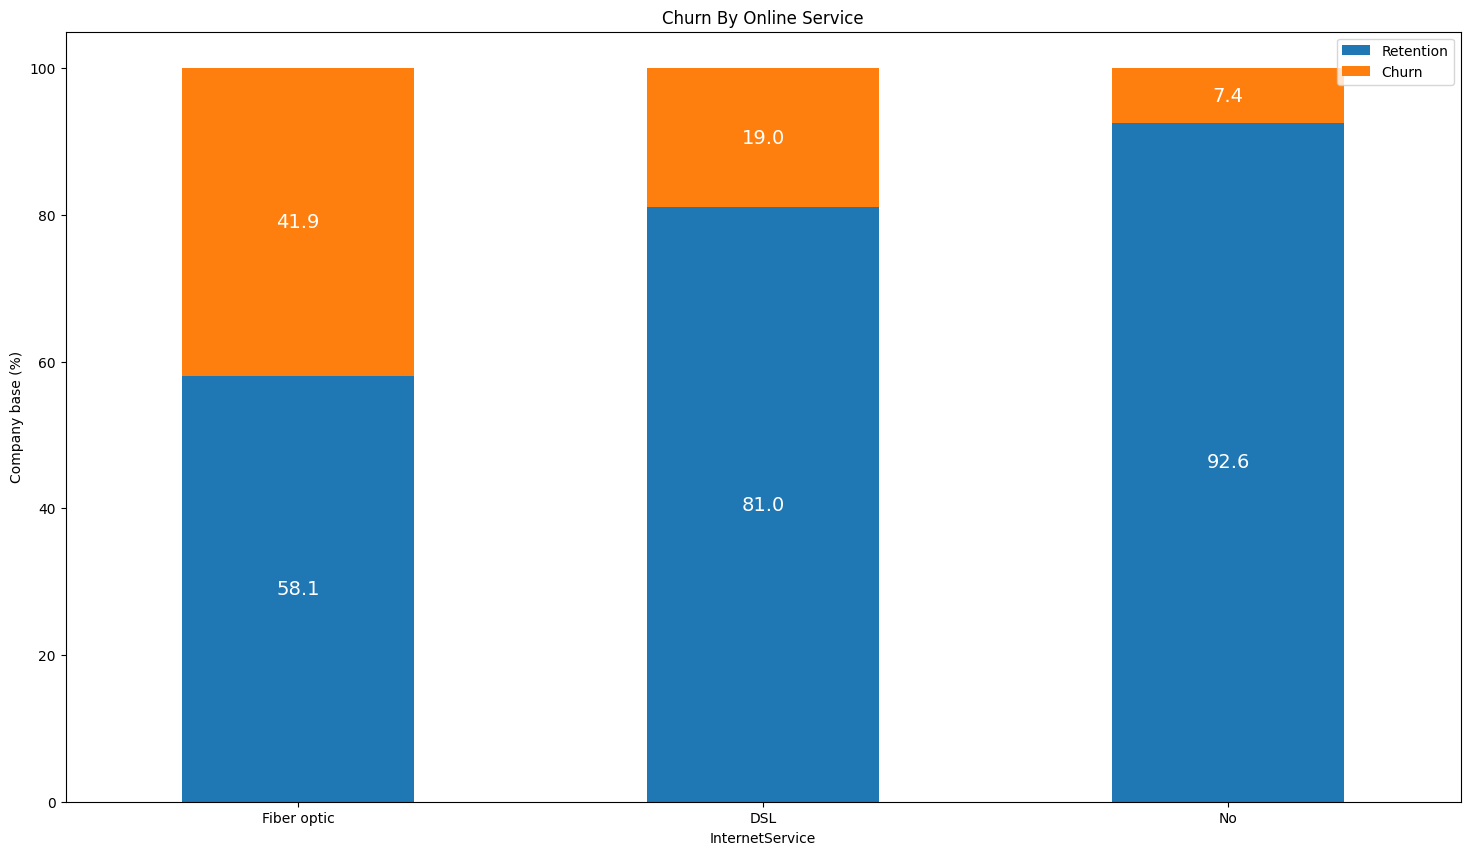

In [528]:
plot_stacked_bars(online_service_churn, "Churn By Online Service")

In [529]:
internet_security = internet_details.groupby([internet_details['OnlineSecurity'], internet_details['Churn_num']])['customerID'].count().unstack(level=1).fillna(0)
online_security_churn = (internet_security.div(internet_security.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

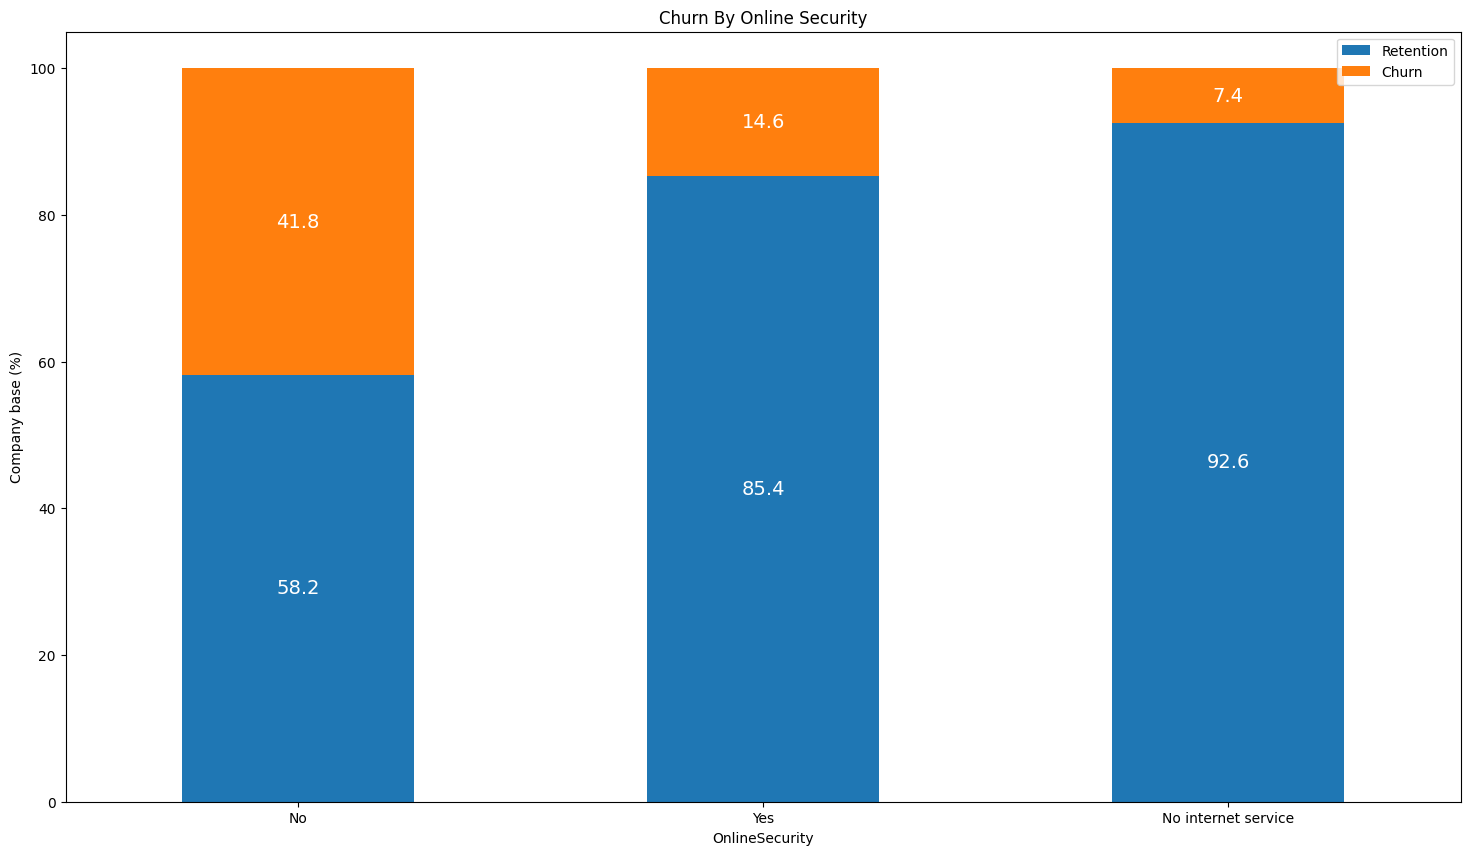

In [530]:
plot_stacked_bars(online_security_churn, "Churn By Online Security")

In [531]:
internet_backup = internet_details.groupby([internet_details['OnlineBackup'], internet_details['Churn_num']])['customerID'].count().unstack(level=1).fillna(0)
online_backup_churn = (internet_backup.div(internet_backup.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

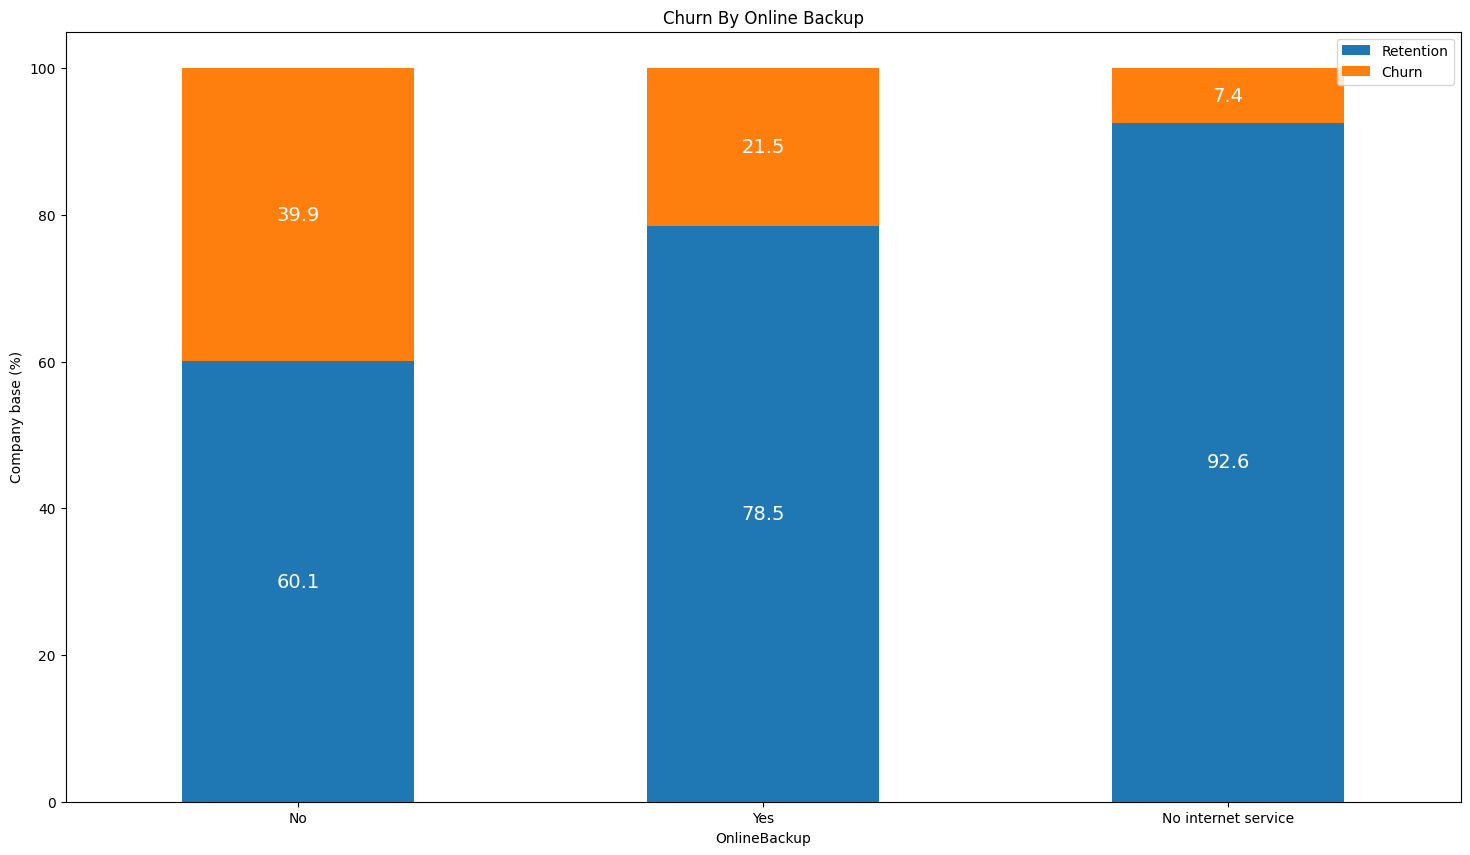

In [532]:
plot_stacked_bars(online_backup_churn, "Churn By Online Backup")

In [533]:
internet_protect = internet_details.groupby([internet_details['DeviceProtection'], internet_details['Churn_num']])['customerID'].count().unstack(level=1).fillna(0)
online_protect_churn = (internet_protect.div(internet_protect.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

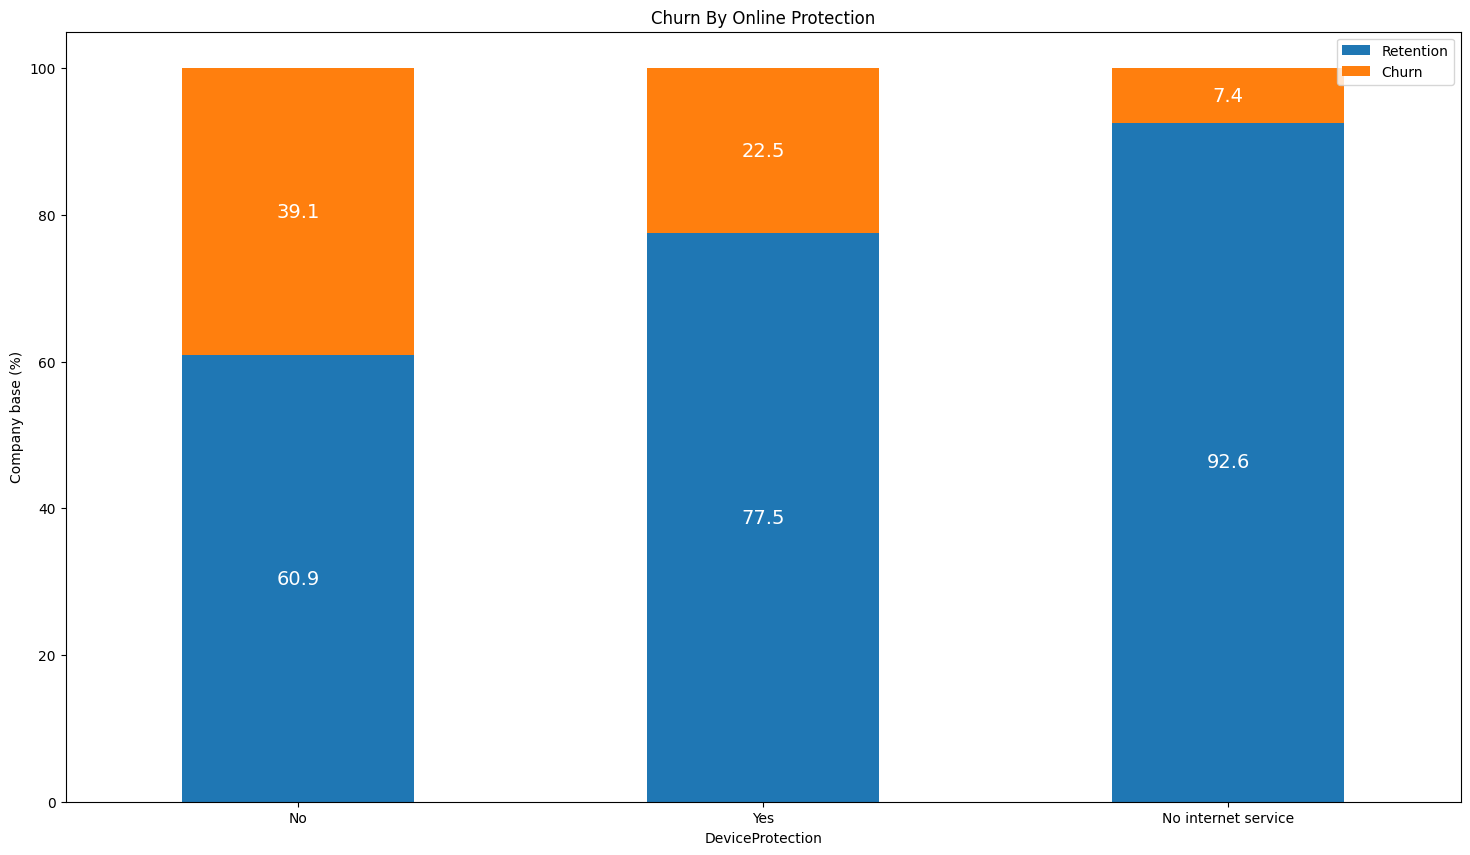

In [534]:
plot_stacked_bars(online_protect_churn, "Churn By Online Protection")

In [535]:
internet_support = internet_details.groupby([internet_details['TechSupport'], internet_details['Churn_num']])['customerID'].count().unstack(level=1).fillna(0)
online_support_churn = (internet_support.div(internet_support.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

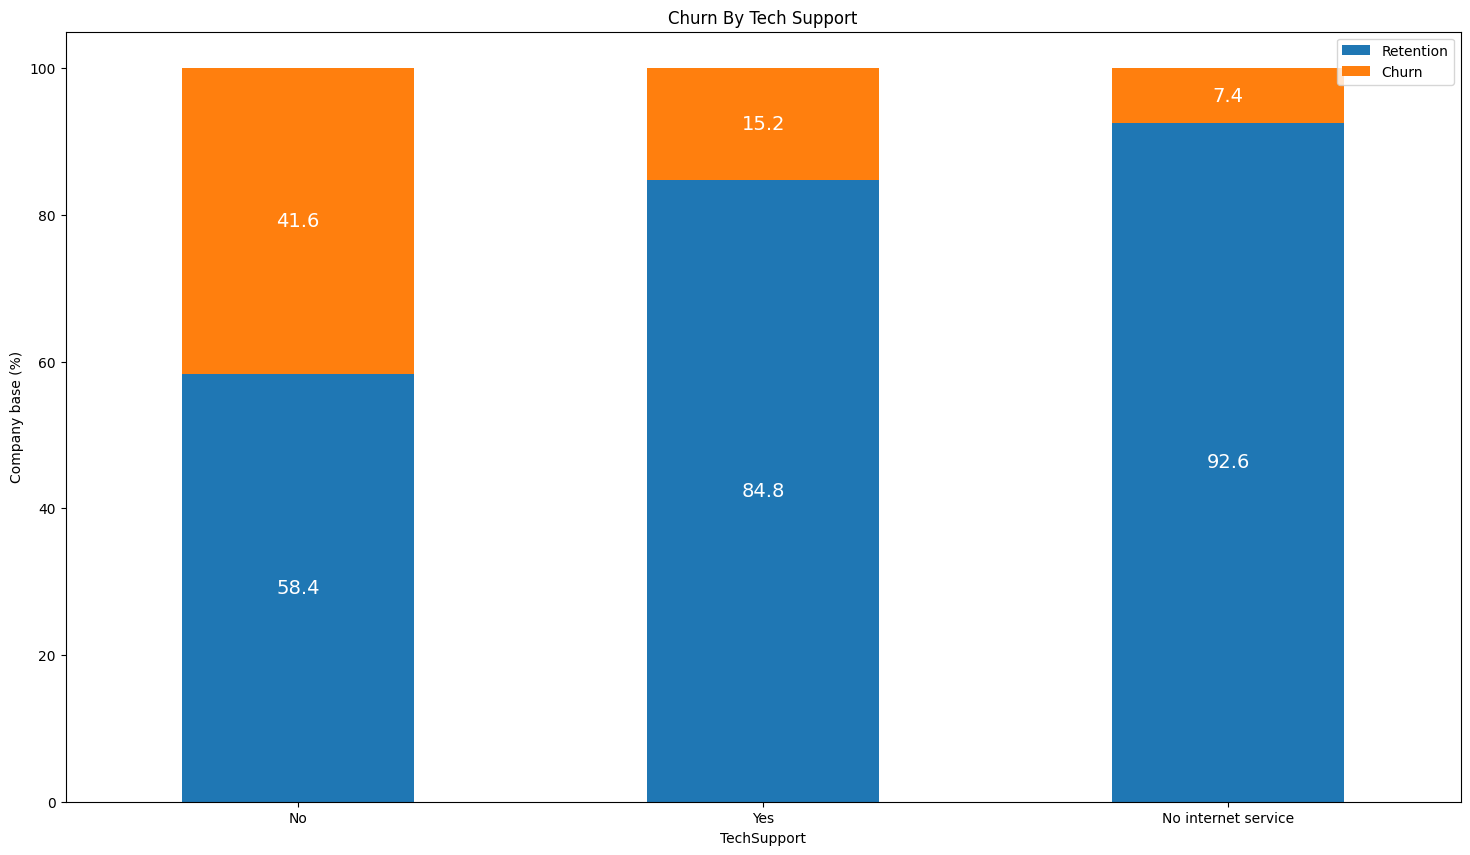

In [536]:
plot_stacked_bars(online_support_churn, "Churn By Tech Support")

In [537]:
internet_stream_tv = internet_details.groupby([internet_details['StreamingTV'], internet_details['Churn_num']])['customerID'].count().unstack(level=1).fillna(0)
online_tvstream_churn = (internet_stream_tv.div(internet_stream_tv.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

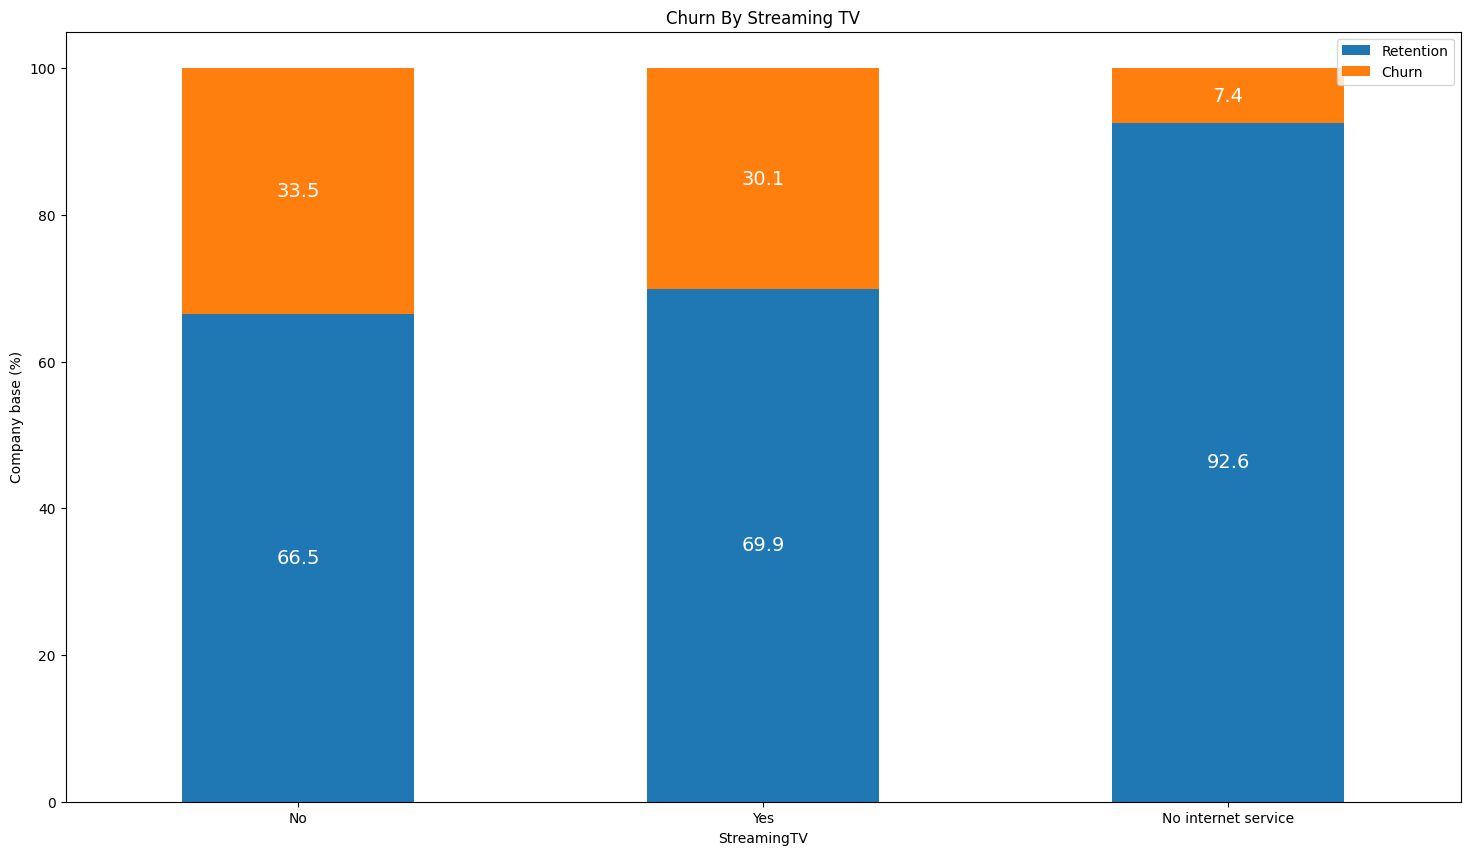

In [538]:
plot_stacked_bars(online_tvstream_churn, "Churn By Streaming TV")

In [539]:
internet_stream_mov = internet_details.groupby([internet_details['StreamingMovies'], internet_details['Churn_num']])['customerID'].count().unstack(level=1).fillna(0)
online_movstream_churn = (internet_stream_mov.div(internet_stream_mov.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

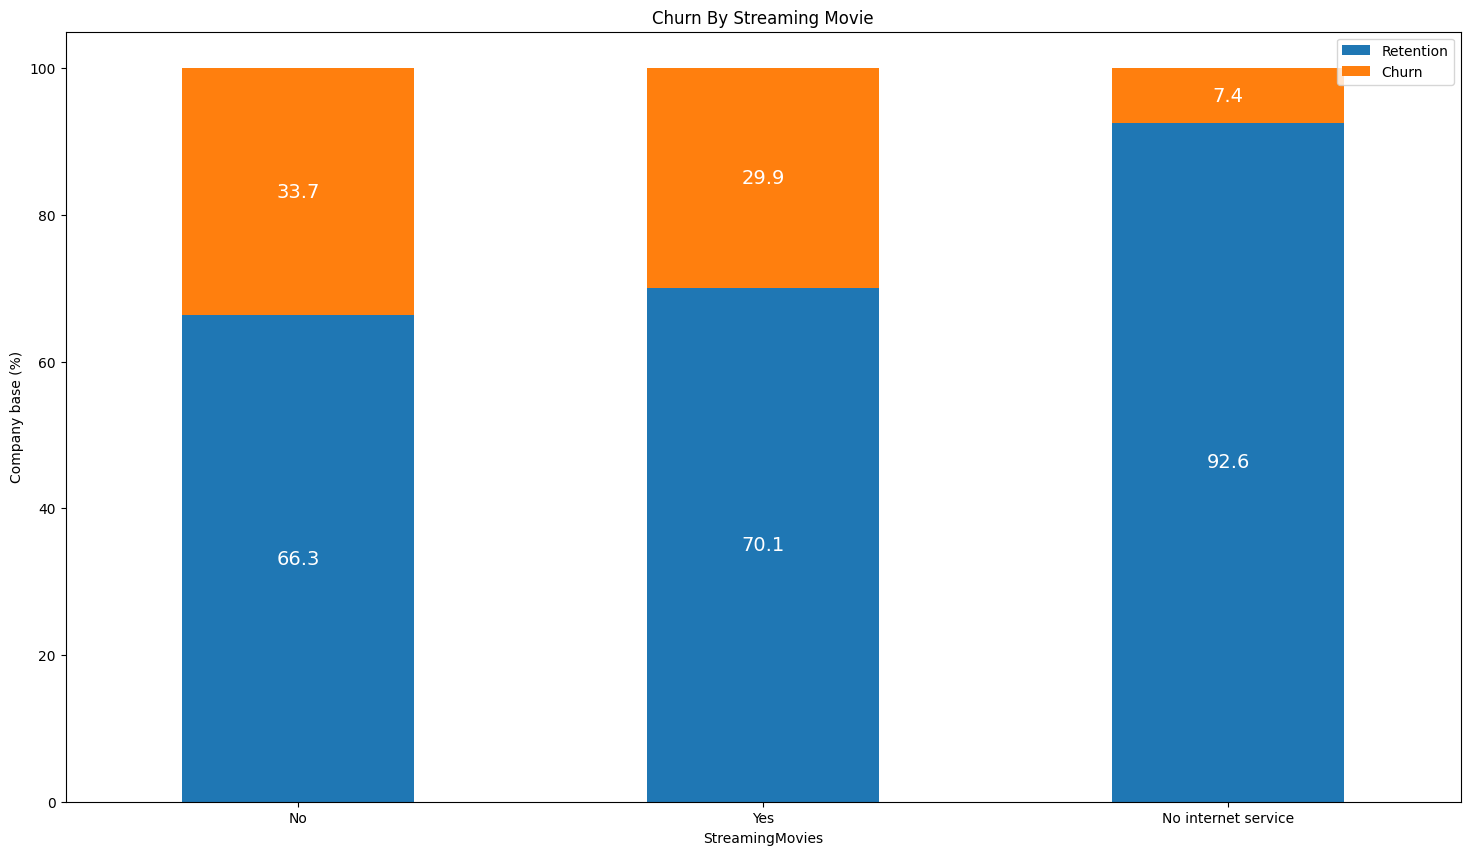

In [540]:
plot_stacked_bars(online_movstream_churn, "Churn By Streaming Movie")

#### Churn By Billings

In [541]:
billing_details = data[['customerID', 'Contract', 'PaperlessBilling',
                      'PaymentMethod', 'Churn_num']]
contract_details = billing_details.groupby([billing_details['Contract'], billing_details['Churn_num']])['customerID'].count().unstack(level=1).fillna(0)
contract_churn = (contract_details.div(contract_details.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

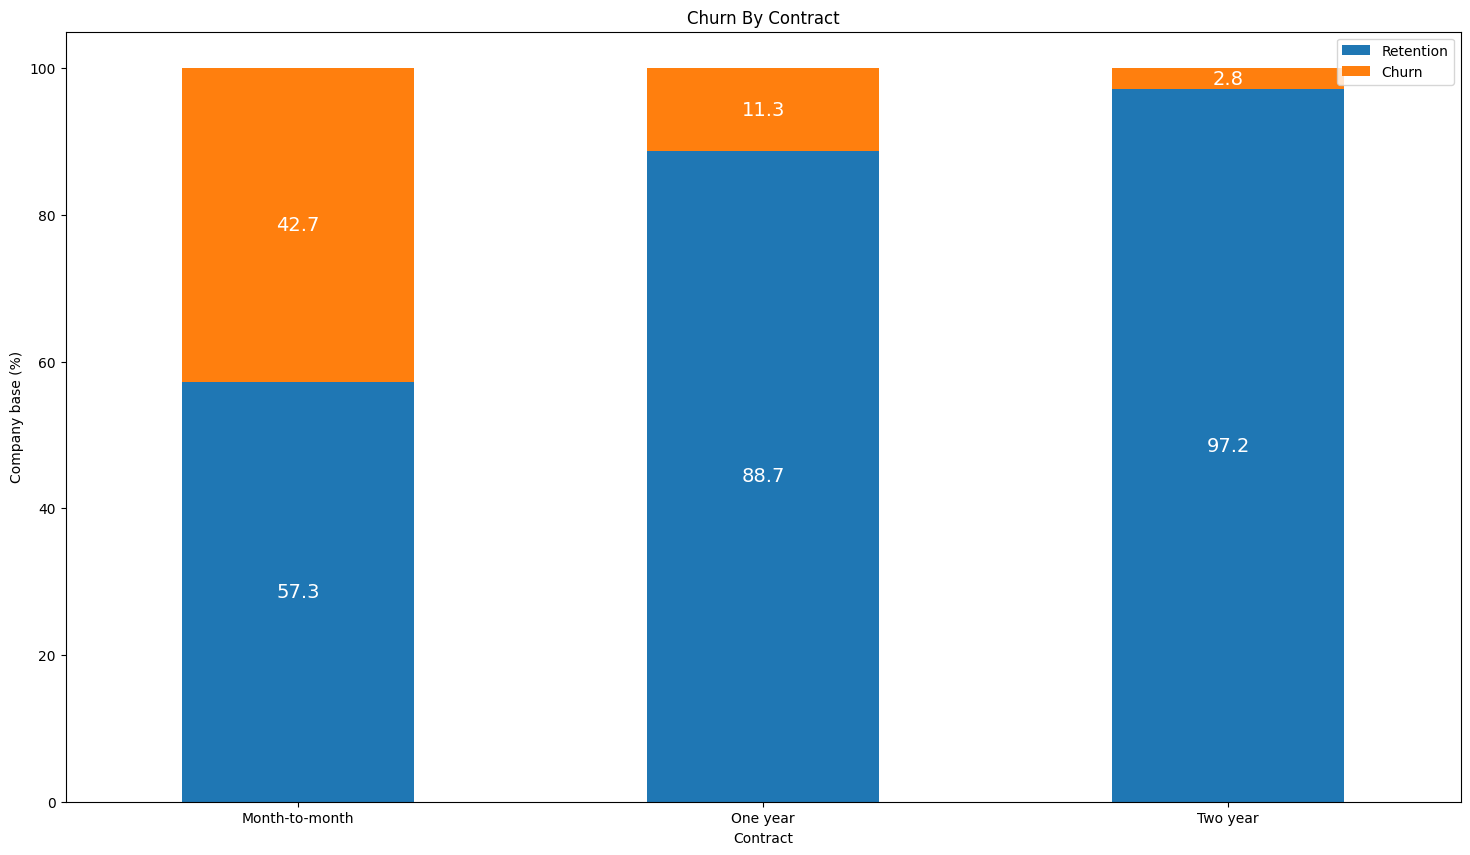

In [542]:
plot_stacked_bars(contract_churn, "Churn By Contract")

In [543]:
paperless_details = billing_details.groupby([billing_details['PaperlessBilling'], billing_details['Churn_num']])['customerID'].count().unstack(level=1).fillna(0)
paperless_churn = (paperless_details.div(paperless_details.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

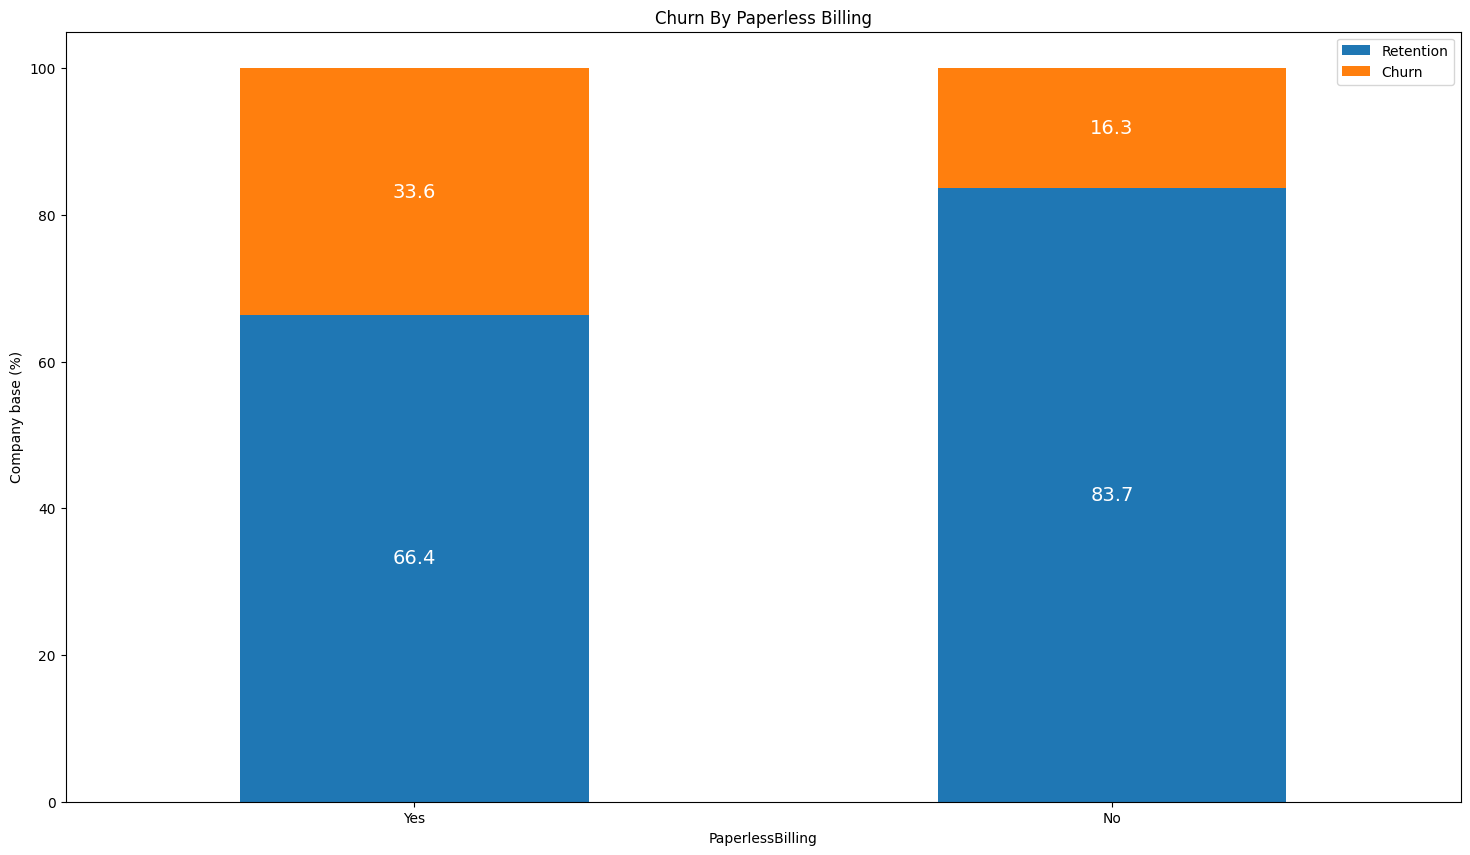

In [544]:
plot_stacked_bars(paperless_churn, "Churn By Paperless Billing")

In [545]:
payment_details = billing_details.groupby([billing_details['PaymentMethod'], billing_details['Churn_num']])['customerID'].count().unstack(level=1).fillna(0)
payment_churn = (payment_details.div(payment_details.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

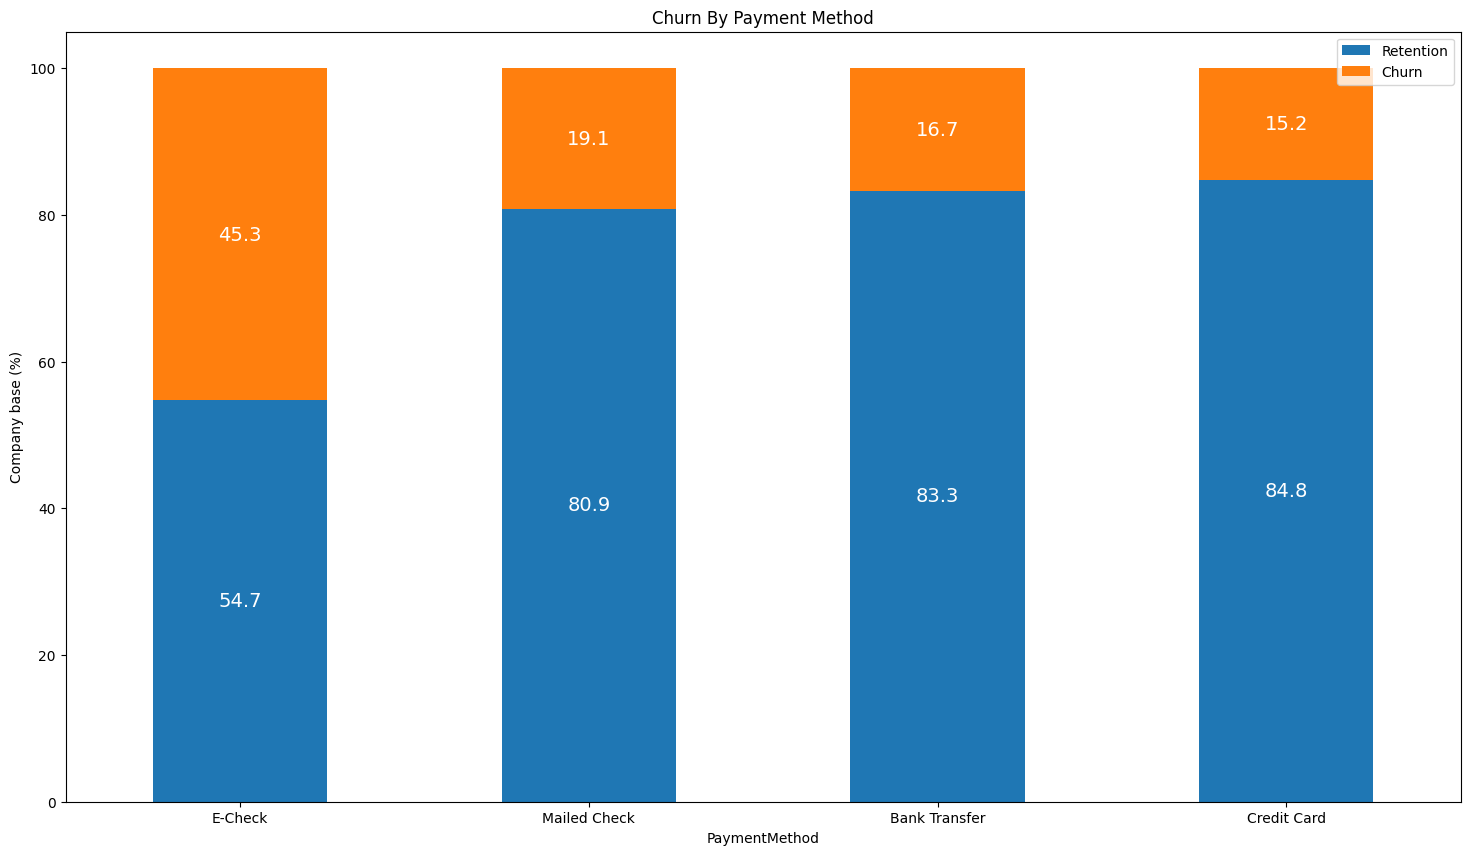

In [546]:
plot_stacked_bars(payment_churn, "Churn By Payment Method")

## Check Data Distribution

In [547]:
# Using Shapiro-Wilks test

In [548]:
from scipy.stats import shapiro, probplot

stat, p = shapiro(data['Churn_num'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data is normally distributed')
else:
    print('Data is not normally distributed')

Statistics=0.551, p=0.000
Data is not normally distributed


C:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7043.
  res = hypotest_fun_out(*samples, **kwds)


In [549]:
# Due to the warning above, Kolmogorov-Smirnov Test is used instead of Shapiro-Wilks test

In [550]:
from scipy.stats import kstest

stat, p = kstest(data['Churn_num'], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data is normally distributed')
else:
    print('Data is not normally distributed')

Statistics=0.500, p=0.000
Data is not normally distributed


In [551]:
# Visualizing distribution

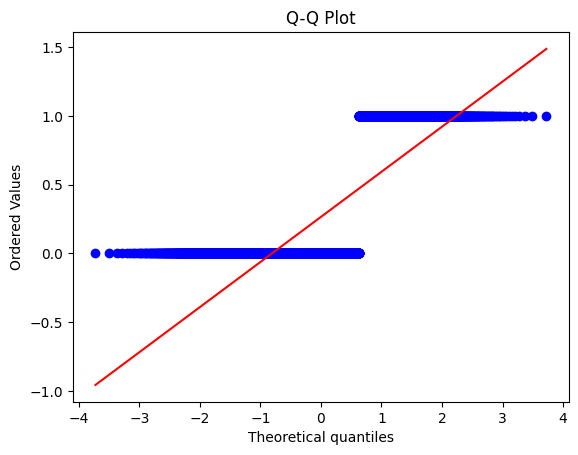

In [552]:
# Using Q-Q Plot
probplot(data['Churn_num'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

## Feature Engineering

In [553]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [554]:
# Monthly charge ratio

data['ChargesRatio'] = data['MonthlyCharges'] / data['TotalCharges']

In [555]:
data['ChargesRatio'].head()

0    1.000000
1    0.030140
2    0.497920
3    0.022980
4    0.466205
Name: ChargesRatio, dtype: float64

## Data Preprocessing

In [556]:
data_pre = data.drop(['customerID', 'Churn_num'], axis = 1)

In [557]:
data_pre.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargesRatio
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No,1.000000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Check,56.95,1889.50,No,0.030140
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed Check,53.85,108.15,Yes,0.497920
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Transfer,42.30,1840.75,No,0.022980
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes,0.466205


In [558]:
data_pre.dropna().head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChargesRatio
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No,1.000000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Check,56.95,1889.50,No,0.030140
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed Check,53.85,108.15,Yes,0.497920
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Transfer,42.30,1840.75,No,0.022980
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes,0.466205


In [559]:
# Create the categorical and numerical column
cat_col = data_pre.select_dtypes(include =['category','object'])
num_col = data_pre.select_dtypes(include =(np.number))

In [560]:
# One-Hot Encoding for categorical features
cat_dum = pd.get_dummies(cat_col, drop_first=True).astype(int)
cat_dum.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit Card,PaymentMethod_E-Check,PaymentMethod_Mailed Check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [561]:
num_col.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ChargesRatio
0,0,1,29.85,29.85,1.000000
1,0,34,56.95,1889.50,0.030140
2,0,2,53.85,108.15,0.497920
3,0,45,42.30,1840.75,0.022980
4,0,2,70.70,151.65,0.466205


In [562]:
df = pd.concat([num_col, cat_dum], axis =1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ChargesRatio,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit Card,PaymentMethod_E-Check,PaymentMethod_Mailed Check,Churn_Yes
0,0,1,29.85,29.85,1.000000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0.030140,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0.497920,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,0.022980,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0.466205,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


### **OLS Model**

In [563]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Split data into features and target
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

X.replace([np.inf, -np.inf], 0, inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [564]:
print(X.shape)
print(y.shape)

(7043, 31)
(7043,)


In [565]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5634, 31)
(5634,)
(1409, 31)
(1409,)


## Model Building

### Picking the best Classification model

In [566]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'AUC-ROC': auc_roc}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression  0.817601   0.688312  0.568365  0.622614  0.865596
Decision Tree        0.724627   0.479564  0.471850  0.475676  0.645423
Random Forest        0.790632   0.646617  0.461126  0.538341  0.840472
Gradient Boosting    0.816891   0.692308  0.554960  0.616071  0.863654


In [567]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Get the probabilities for the positive class
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'AUC-ROC': auc_roc}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression  0.816182   0.686275  0.563003  0.618557  0.865309
Decision Tree        0.724627   0.479675  0.474531  0.477089  0.646281
Random Forest        0.791341   0.649057  0.461126  0.539185  0.840380
Gradient Boosting    0.816891   0.692308  0.554960  0.616071  0.863669


Based on the metrics provided, **Gradient Boosting** appears to be a very good model overall.

<div><b>Accuracy:</b> It has the highest accuracy at 0.81.</div>
<div><b>Precision:</b> It has the highest precision at 0.68.</div>
<div><b>Recall:</b> It has a relatively high recall at 0.55.</div>
<div><b>F1 Score:</b> It has the highest F1 score at 0.61.</div>
<div><b>AUC-ROC:</b> It has the highest AUC-ROC score at 0.86, indicating it performs well in distinguishing between classes.

In [568]:
# Eliminating columns with multicollinearity with VIF check

In [569]:
import statsmodels.api as sm
X_constant=sm.add_constant(X)

In [570]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,vif
SeniorCitizen,1.153428
tenure,8.883218
MonthlyCharges,865.067235
TotalCharges,11.340422
ChargesRatio,1.677819
gender_Male,1.002319
Partner_Yes,1.466377
Dependents_Yes,1.385235
PhoneService_Yes,inf
MultipleLines_No phone service,inf


In [571]:
def remove_high_vif_columns(X, threshold=10):
    # Replace inf with NaN
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Drop columns with NaN values
    X.dropna(axis=1, inplace=True)
    
    # Add a constant column for VIF calculation
    X_constant = sm.add_constant(X)
    
    # Calculate VIF for each feature
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
    vif['Feature'] = X_constant.columns
    
    # Filter out columns with VIF greater than the threshold
    high_vif_columns = vif[vif['VIF'] > threshold]['Feature']
    high_vif_columns = high_vif_columns[high_vif_columns != 'const']  # Exclude the constant column
    
    # Remove high VIF columns from the dataset
    X_New = X.drop(columns=high_vif_columns)
    
    return X_New, high_vif_columns

In [572]:
X_New, removed_columns = remove_high_vif_columns(X, threshold = 1000)
print("Removed columns:", removed_columns.head())
print("New DataFrame shape:", X_new.shape)

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removed columns: 9                       PhoneService_Yes
10        MultipleLines_No phone service
13                    InternetService_No
14    OnlineSecurity_No internet service
16      OnlineBackup_No internet service
Name: Feature, dtype: object
New DataFrame shape: (7043, 20)


In [573]:
# Checking X_new

In [574]:
X_constant_New=sm.add_constant(X_New)

In [575]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant_New.values, i) for i in range(X_constant_New.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X_New.columns)

,vif
SeniorCitizen,1.148938
tenure,8.830870
MonthlyCharges,18.159866
TotalCharges,11.216525
ChargesRatio,1.675591
gender_Male,1.002058
Partner_Yes,1.465974
Dependents_Yes,1.383998
MultipleLines_Yes,1.660385
InternetService_Fiber optic,7.026111


In [576]:
X_new, removed_columns = remove_high_vif_columns(X_New, threshold = 10)
print("Removed columns:", removed_columns.head())
print("New DataFrame shape:", X_new.shape)

Removed columns: 3    MonthlyCharges
4      TotalCharges
Name: Feature, dtype: object
New DataFrame shape: (7043, 20)


In [577]:
# Using Recursive Elimination to remove features

In [578]:
import statsmodels.api as sm

# Initialize the list of columns
selected_features = list(X_new.columns)

# Set a threshold for p-values
p_value_threshold = 0.05

while len(selected_features) > 0:
    # Add a constant term for the intercept
    X_with_const = sm.add_constant(X[selected_features])
    
    # Fit the model
    model = sm.OLS(y, X_with_const).fit()
    
    # Get the p-values for the features
    p_values = model.pvalues[1:]  # Exclude the intercept
    
    # Find the feature with the maximum p-value
    max_p_value = p_values.max()
    feature_with_max_p_value = p_values.idxmax()
    
    # Check if the maximum p-value is above the threshold
    if max_p_value > p_value_threshold:
        selected_features.remove(feature_with_max_p_value)
    else:
        break

In [579]:
selected_features

['SeniorCitizen',
 'tenure',
 'ChargesRatio',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'OnlineSecurity_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_E-Check',
 'PaymentMethod_Mailed Check']

__We can choose to use the selected_features.__

In [580]:
# Take the selected features from X as a DataFrame
X_selected = X[selected_features]

X_selected.head()

,SeniorCitizen,tenure,ChargesRatio,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_E-Check,PaymentMethod_Mailed Check
0,0,1,1.000000,0,0,0,0,0,0,0,0,1,1,0
1,0,34,0.030140,0,0,1,0,0,0,1,0,0,0,1
2,0,2,0.497920,0,0,1,0,0,0,0,0,1,0,1
3,0,45,0.022980,0,0,1,1,0,0,1,0,0,0,0
4,0,2,0.466205,0,1,0,0,0,0,0,0,1,1,0


In [581]:
# Using X_new

In [582]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.20,random_state=42)

In [583]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5634, 20)
(5634,)
(1409, 20)
(1409,)


## GBC Model

In [584]:
# Training the GBC model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [585]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC-ROC: {auc_roc}')

Accuracy: 0.8183108587650816
Precision: 0.6983050847457627
Recall: 0.5522788203753352
F1 Score: 0.6167664670658682
AUC-ROC: 0.8594395333671473


In [586]:
### Hyperparameter Tuning

In [587]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}

In [588]:
model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='roc_auc', verbose=2)

In [589]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC-ROC: {auc_roc}')

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.8}
Accuracy: 0.8168914123491838
Precision: 0.7203065134099617
Recall: 0.5040214477211796
F1 Score: 0.5930599369085173
AUC-ROC: 0.8628968397735155


In [590]:
# Checking if model is overfitted or underfitted

In [591]:
# Evaluate on training set
y_train_pred = best_model.predict(X_train)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc_roc = roc_auc_score(y_train, y_train_pred_proba)

print("Training Set Performance:")
print(f'Accuracy: {train_accuracy}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1 Score: {train_f1}')
print(f'AUC-ROC: {train_auc_roc}')
print("\n")

# Evaluate on test set
y_test_pred = best_model.predict(X_test)
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc_roc = roc_auc_score(y_test, y_test_pred_proba)

print("Test Set Performance:")
print(f'Accuracy: {test_accuracy}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1 Score: {test_f1}')
print(f'AUC-ROC: {test_auc_roc}')
print("\n")

# Determine if the model is overfitted, underfitted, or balanced
def check_model_fit(train_metric, test_metric, threshold=0.05):
    if train_metric > test_metric + threshold:
        return "Overfitted"
    elif test_metric > train_metric + threshold:
        return "Underfitted"
    else:
        return "Balanced"

fit_status = {
    'Accuracy': check_model_fit(train_accuracy, test_accuracy),
    'Precision': check_model_fit(train_precision, test_precision),
    'Recall': check_model_fit(train_recall, test_recall),
    'F1 Score': check_model_fit(train_f1, test_f1),
    'AUC-ROC': check_model_fit(train_auc_roc, test_auc_roc)
}

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Training': [train_accuracy, train_precision, train_recall, train_f1, train_auc_roc],
    'Test': [test_accuracy, test_precision, test_recall, test_f1, test_auc_roc],
    'Fit Status': [fit_status['Accuracy'], fit_status['Precision'], fit_status['Recall'], fit_status['F1 Score'], fit_status['AUC-ROC']]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])

print(results_df)


Training Set Performance:
Accuracy: 0.8141640042598509
Precision: 0.7160731472569779
Recall: 0.49732620320855614
F1 Score: 0.58698224852071
AUC-ROC: 0.864102646528975


Test Set Performance:
Accuracy: 0.8168914123491838
Precision: 0.7203065134099617
Recall: 0.5040214477211796
F1 Score: 0.5930599369085173
AUC-ROC: 0.8628968397735155


           Training      Test Fit Status
Accuracy   0.814164  0.816891   Balanced
Precision  0.716073  0.720307   Balanced
Recall     0.497326  0.504021   Balanced
F1 Score   0.586982  0.593060   Balanced
AUC-ROC    0.864103  0.862897   Balanced


In [592]:
# Features Importance

In [593]:
feature_importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)

                        Feature  Importance
2                  ChargesRatio    0.408503
7   InternetService_Fiber optic    0.246177
18        PaymentMethod_E-Check    0.078659
15            Contract_Two year    0.050958
14            Contract_One year    0.045971
1                        tenure    0.037456
16         PaperlessBilling_Yes    0.025051
13          StreamingMovies_Yes    0.022936
6             MultipleLines_Yes    0.015715
8            OnlineSecurity_Yes    0.013882
0                 SeniorCitizen    0.013269
12              StreamingTV_Yes    0.012533
11              TechSupport_Yes    0.009946
10         DeviceProtection_Yes    0.004404
19   PaymentMethod_Mailed Check    0.004094
5                Dependents_Yes    0.004020
9              OnlineBackup_Yes    0.003430
3                   gender_Male    0.001320
17    PaymentMethod_Credit Card    0.001027
4                   Partner_Yes    0.000650


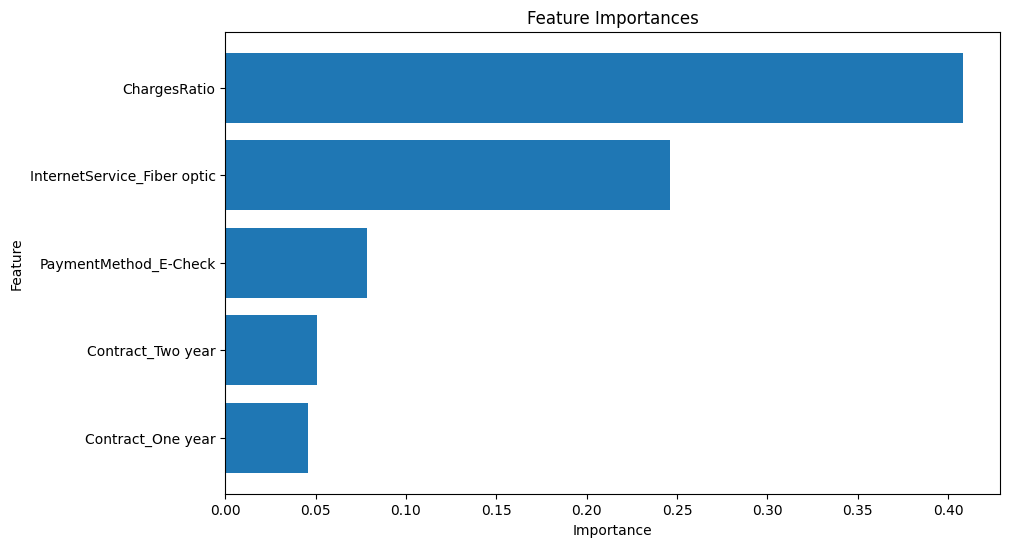

In [594]:
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

__The five largest factors to predict churning for Vertex are Charges Ratio (Monthly Charges/Yearly Charges), Internet Service, Payment Method and Contract length__

In [595]:
y_pred_proba

array([0.58437347, 0.13387798, 0.04206066, ..., 0.06037154, 0.04117275,
       0.46666796])

In [596]:
X_test = X_test.reset_index()
X_test.head()

,index,SeniorCitizen,tenure,ChargesRatio,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit Card,PaymentMethod_E-Check,PaymentMethod_Mailed Check
0,185,0,1,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,2715,0,41,0.025340,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3825,0,52,0.018755,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1807,0,1,1.000000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,132,0,67,0.015506,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [597]:
X_test.drop(columns='index', inplace=True)

In [598]:
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = y_pred_proba.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')

<div style="text-align: center;">
    <img src="https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExMWg5aXFnd2x5czZkenJ0ZW5qYnhsYTNlcW55OGl6ZHBkdXhxMGwybCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o6MblBB2V2qoQuVhK/giphy.webp" alt="Telco" style="width: 500px;" />
</div>